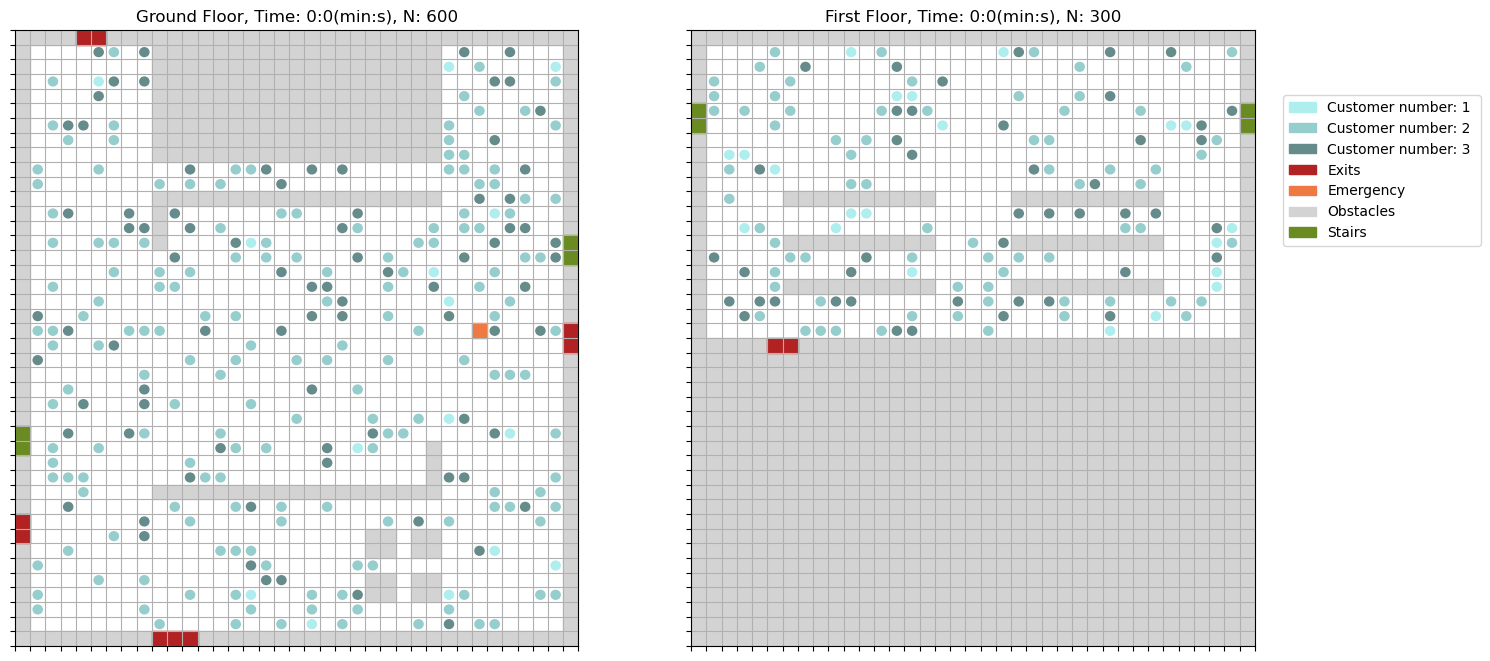

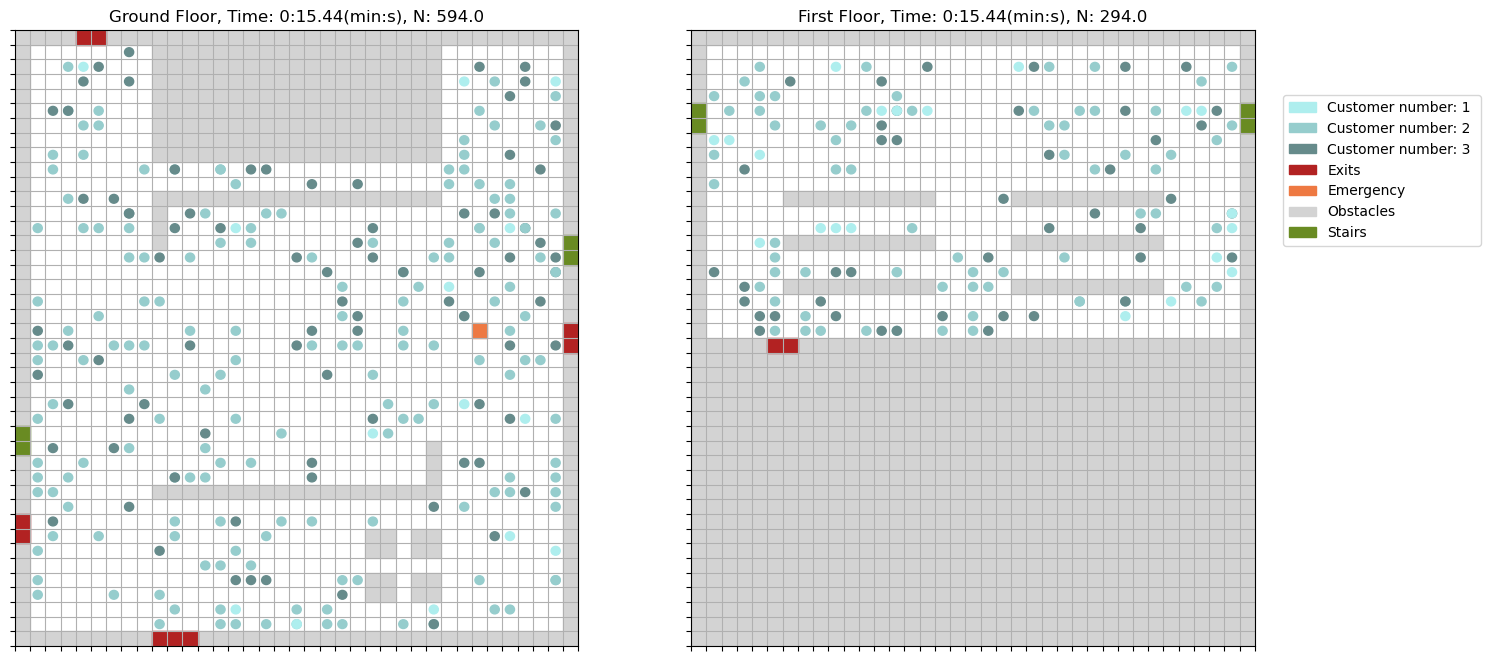

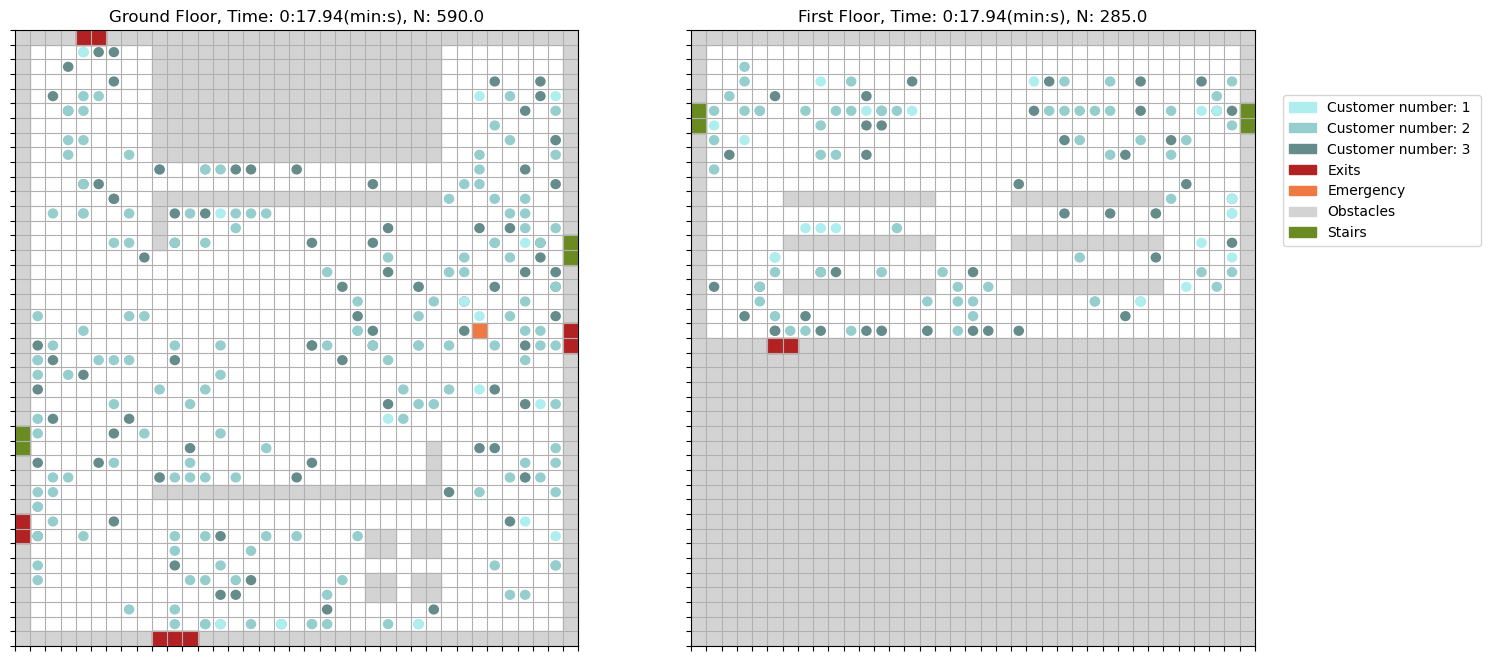

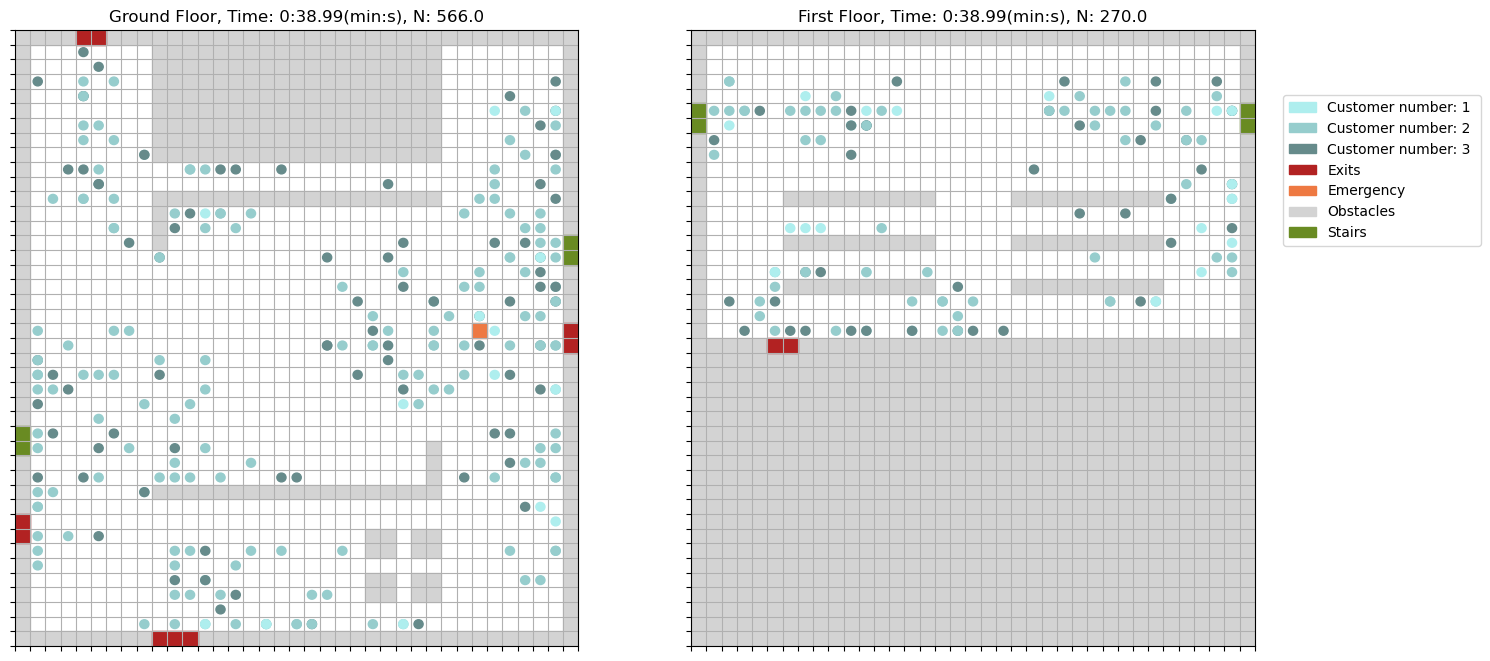

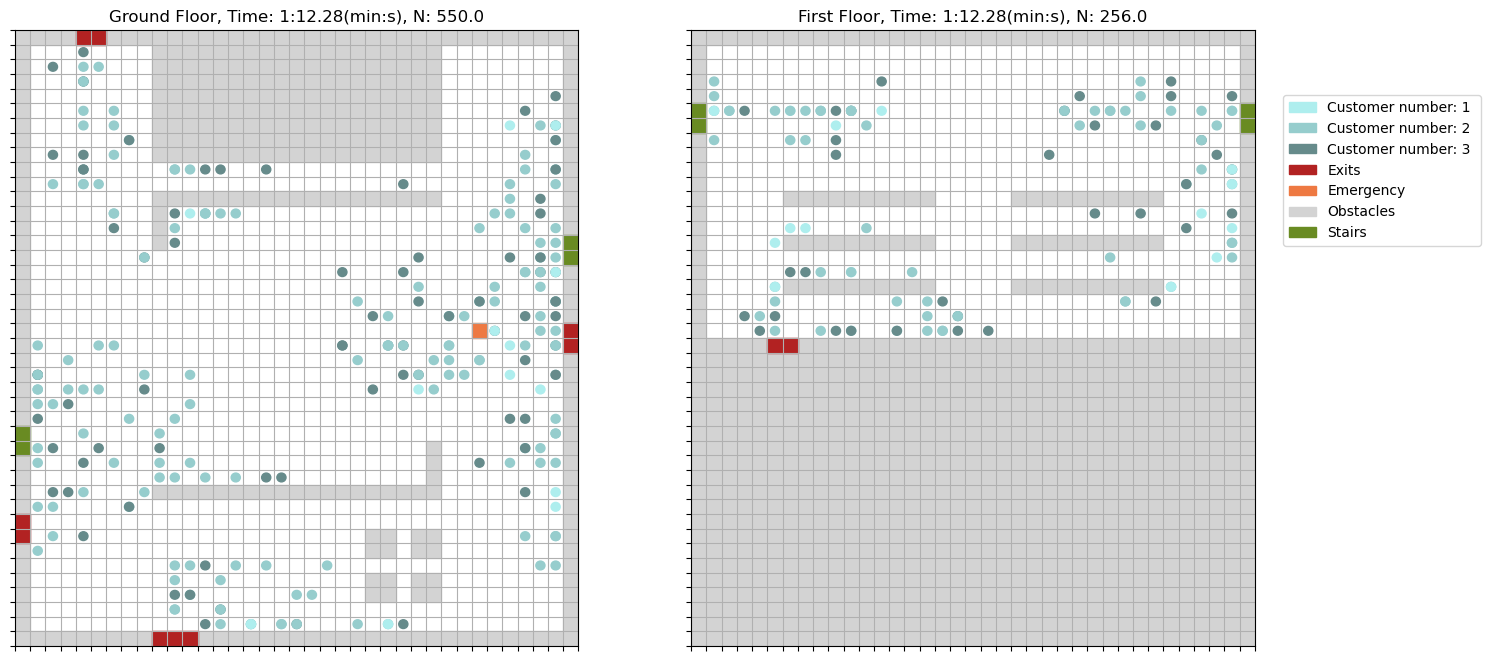

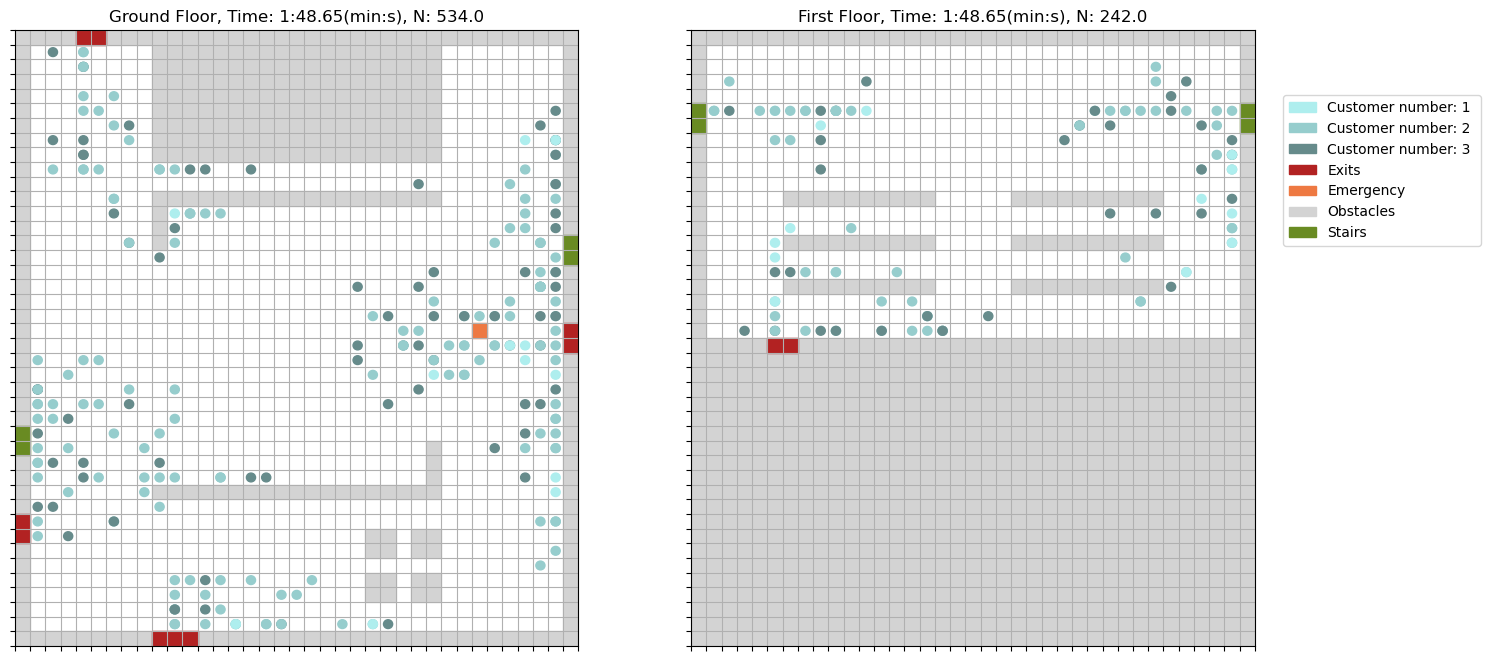

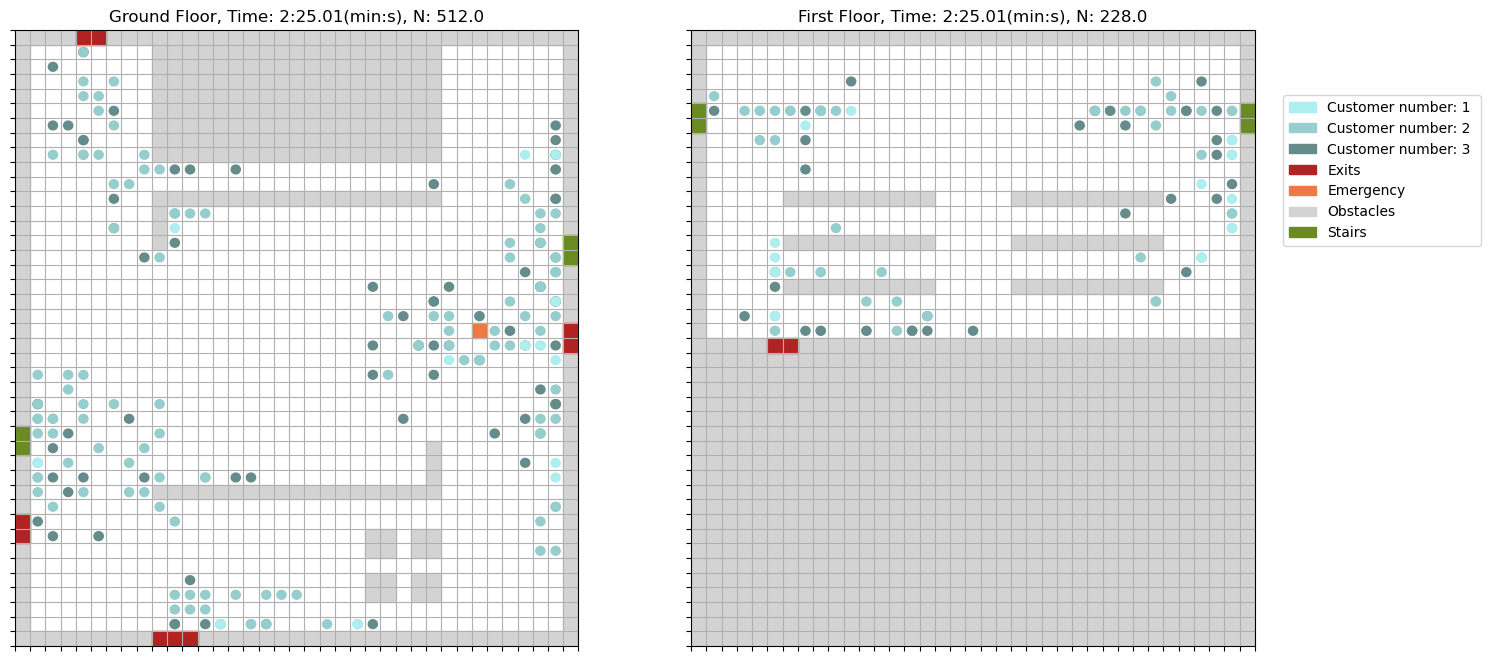

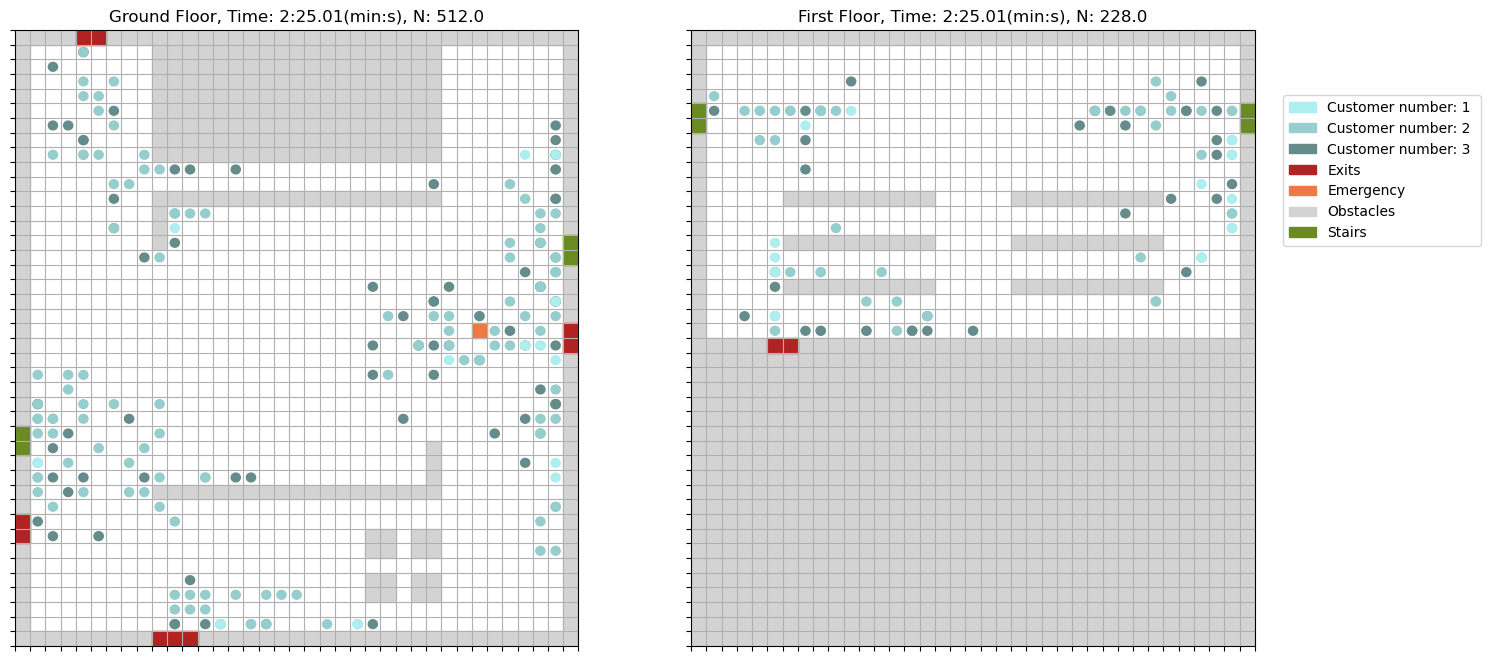

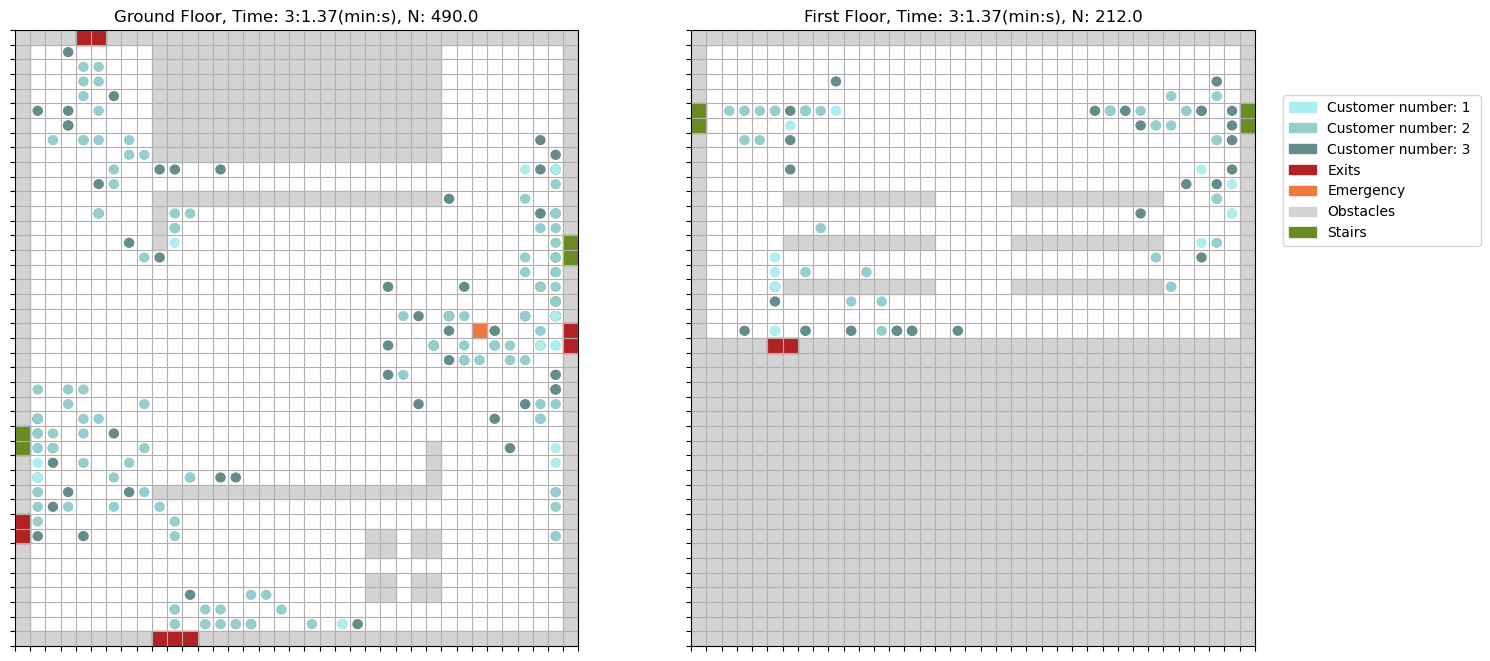

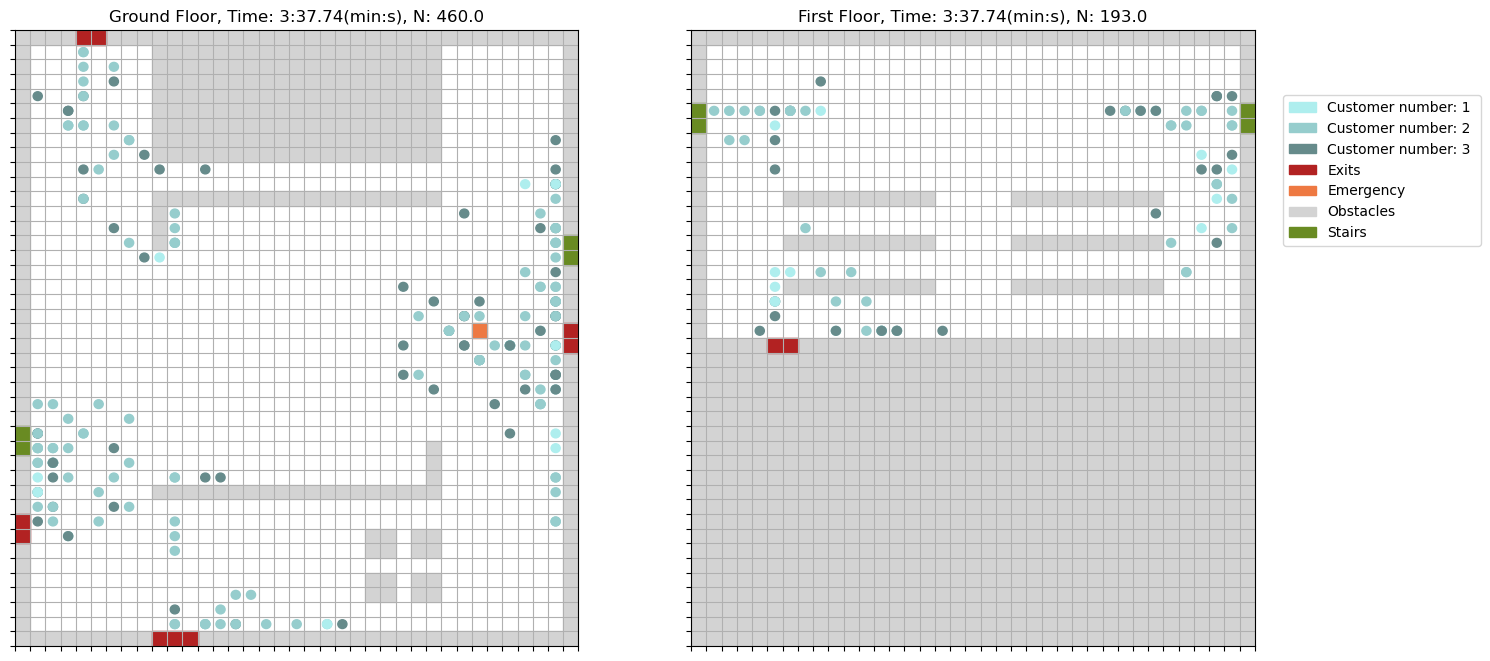

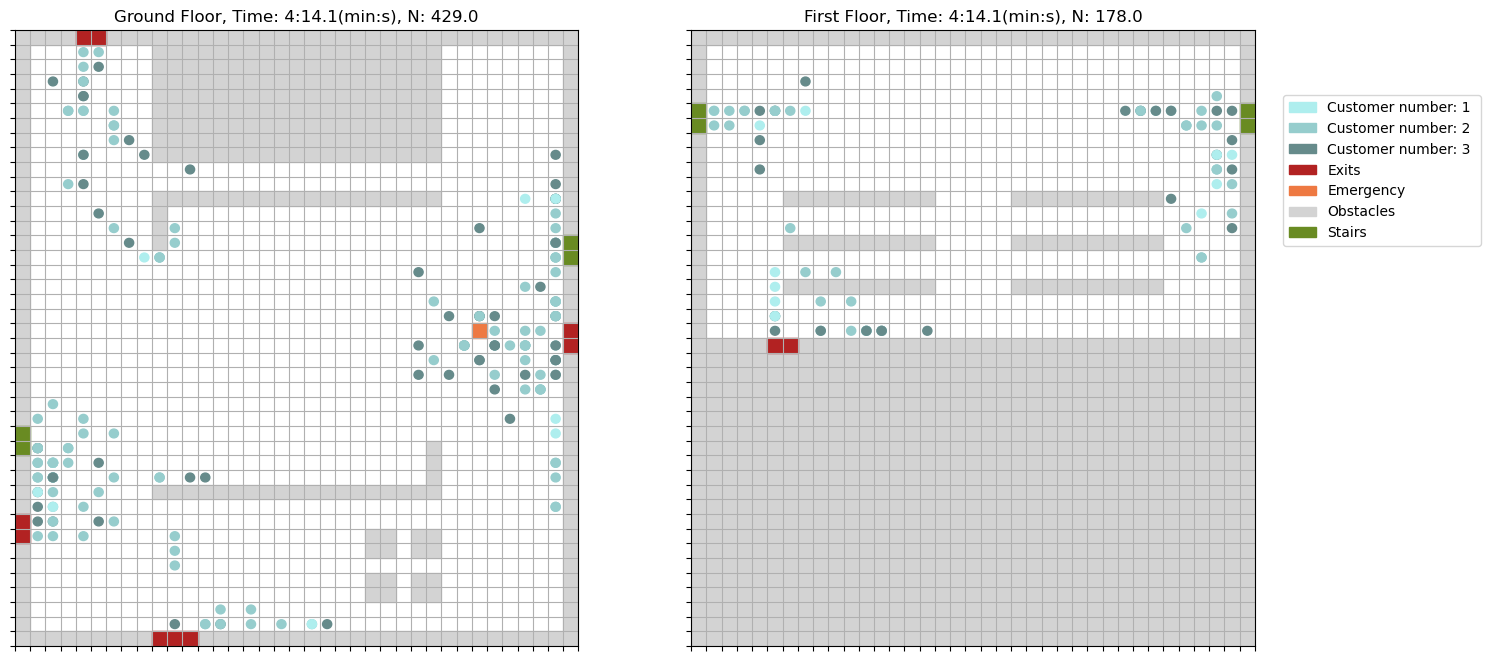

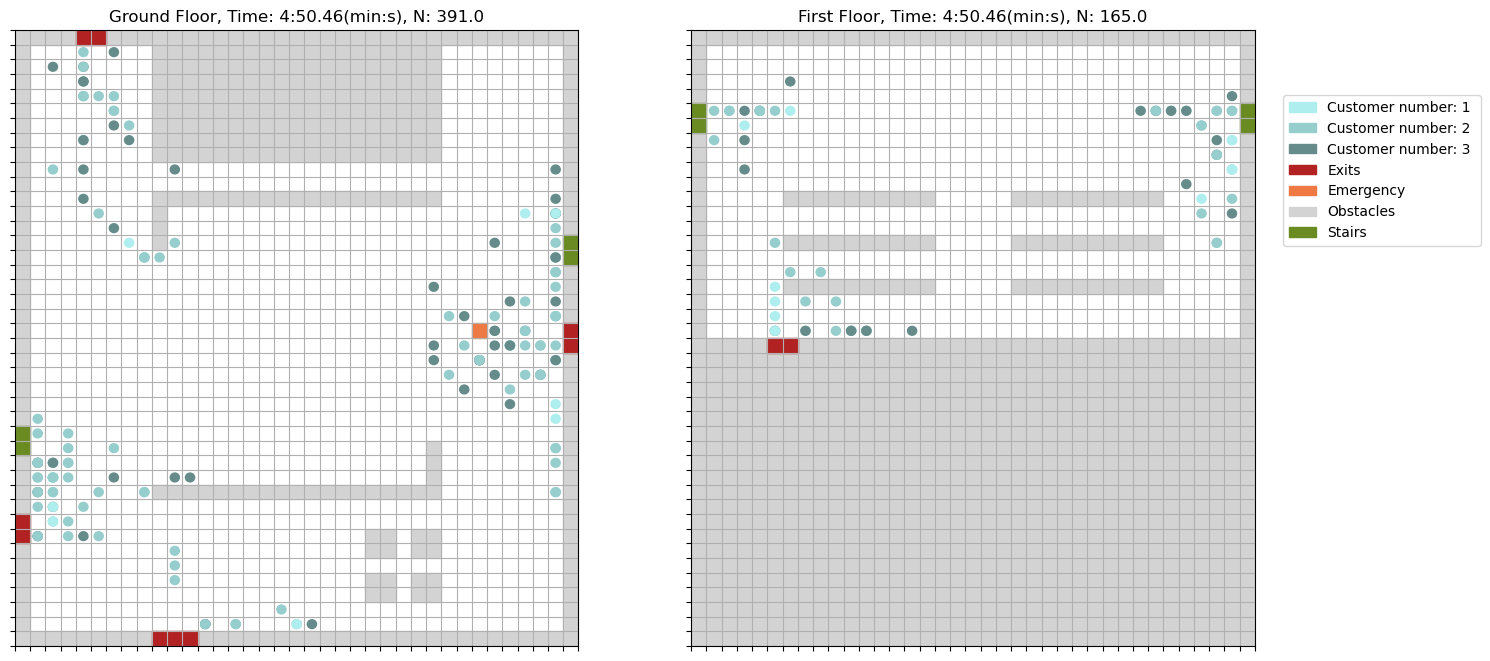

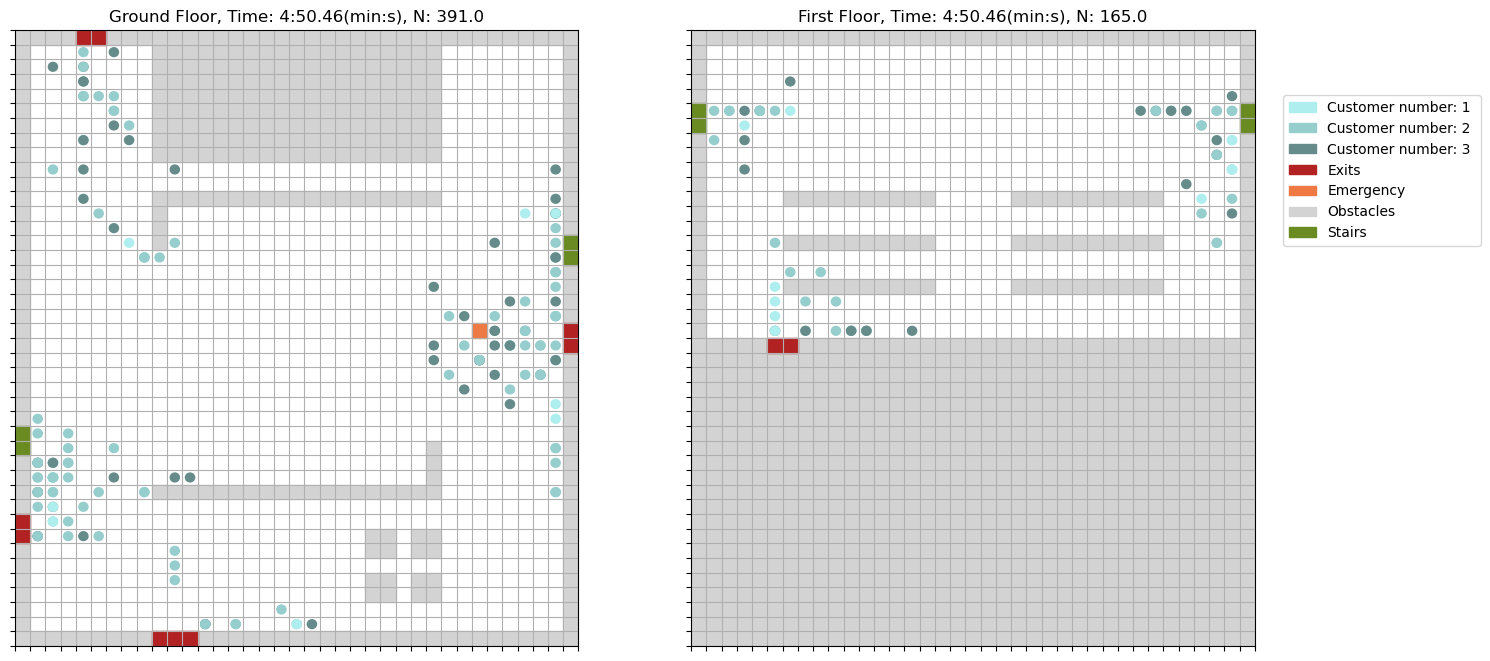

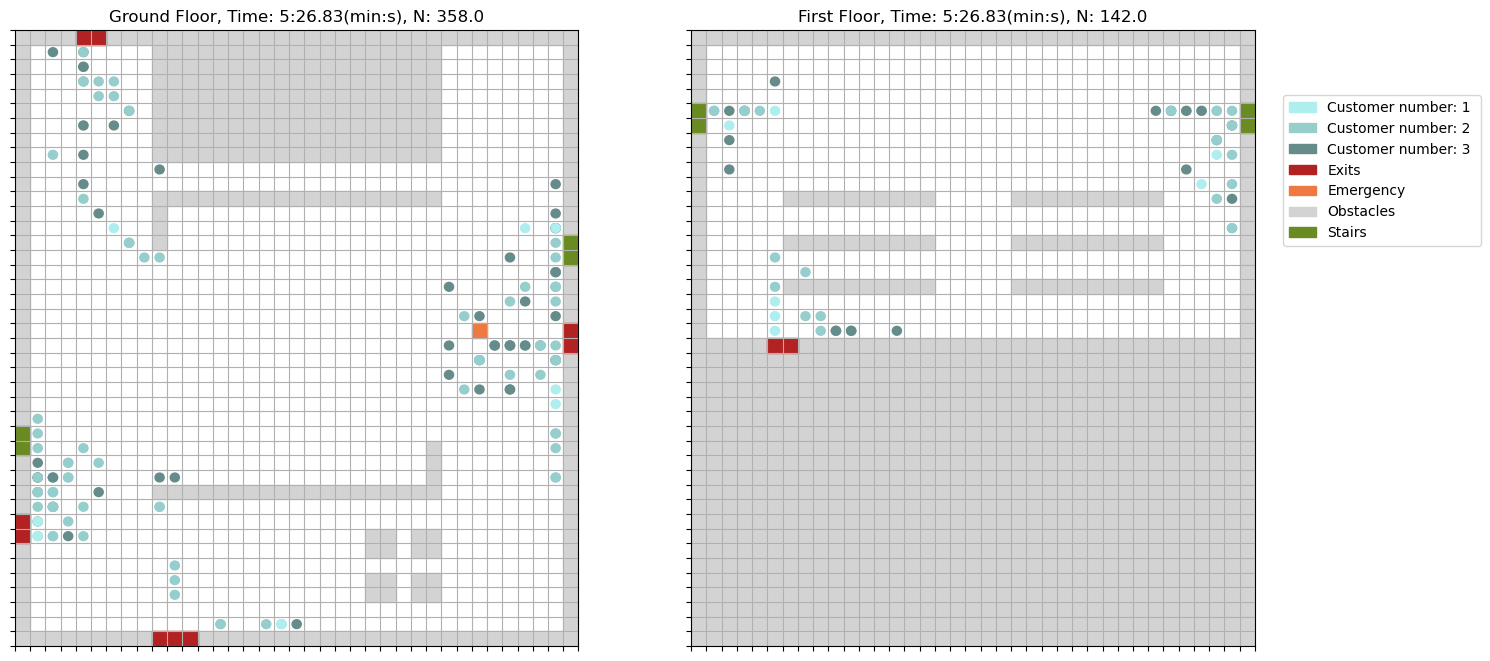

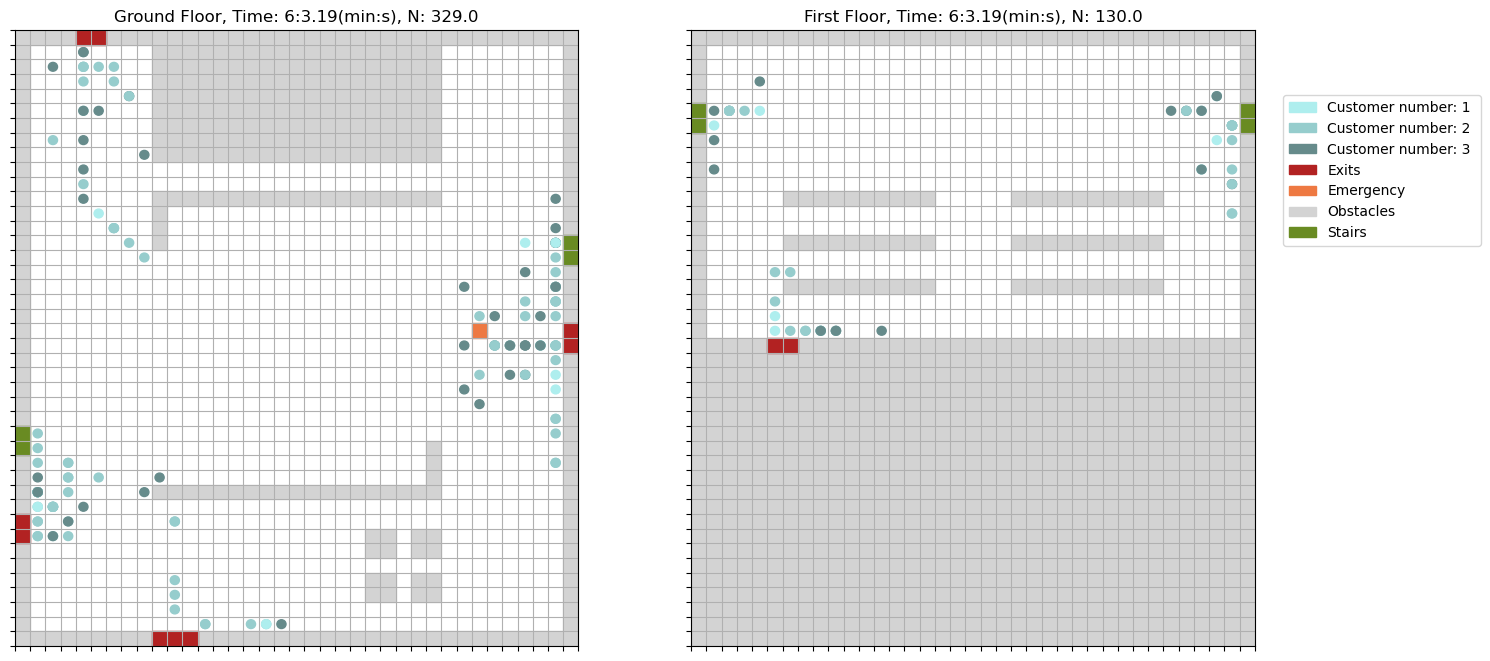

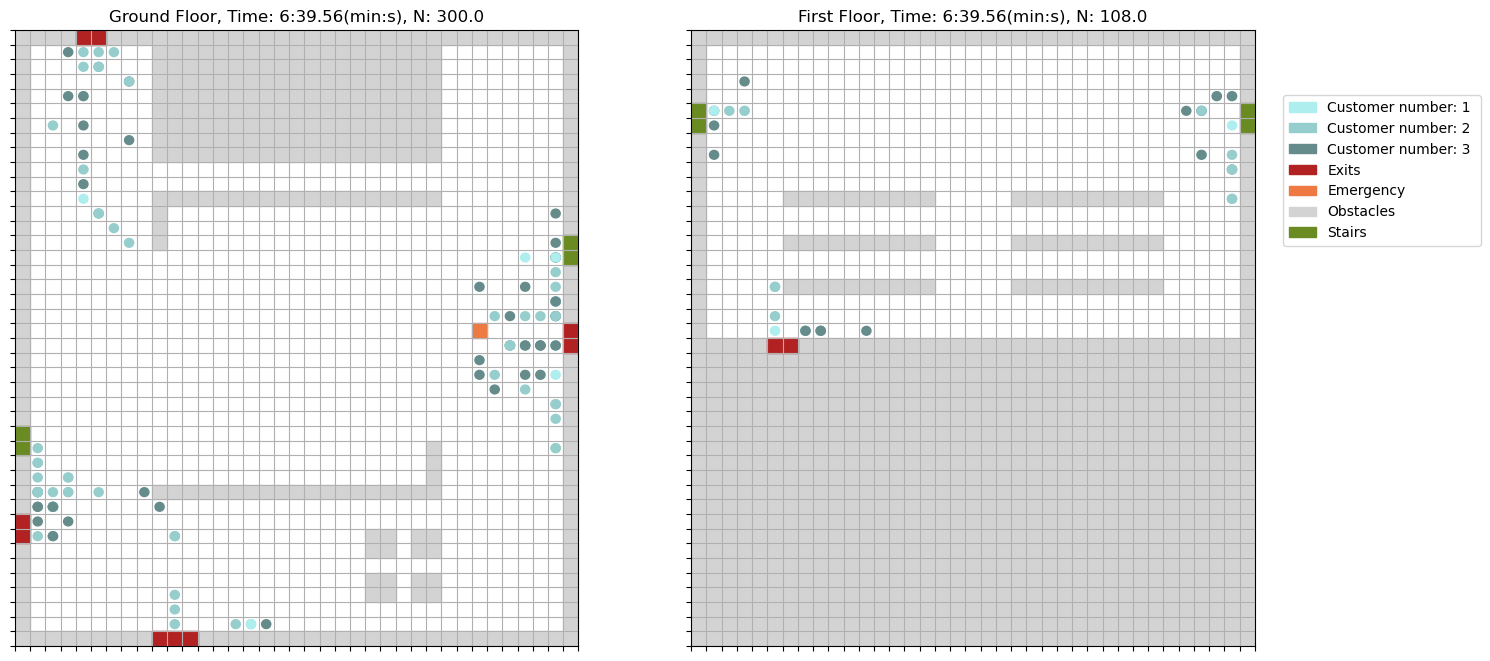

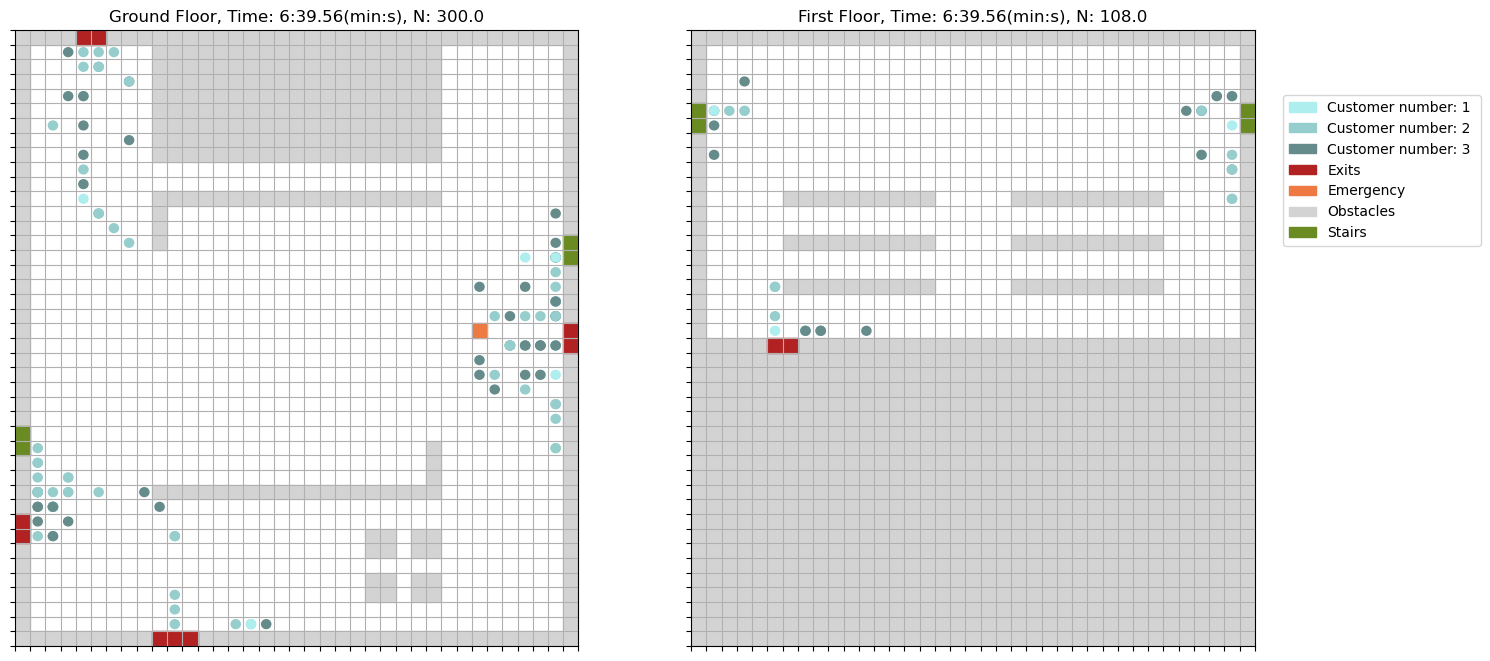

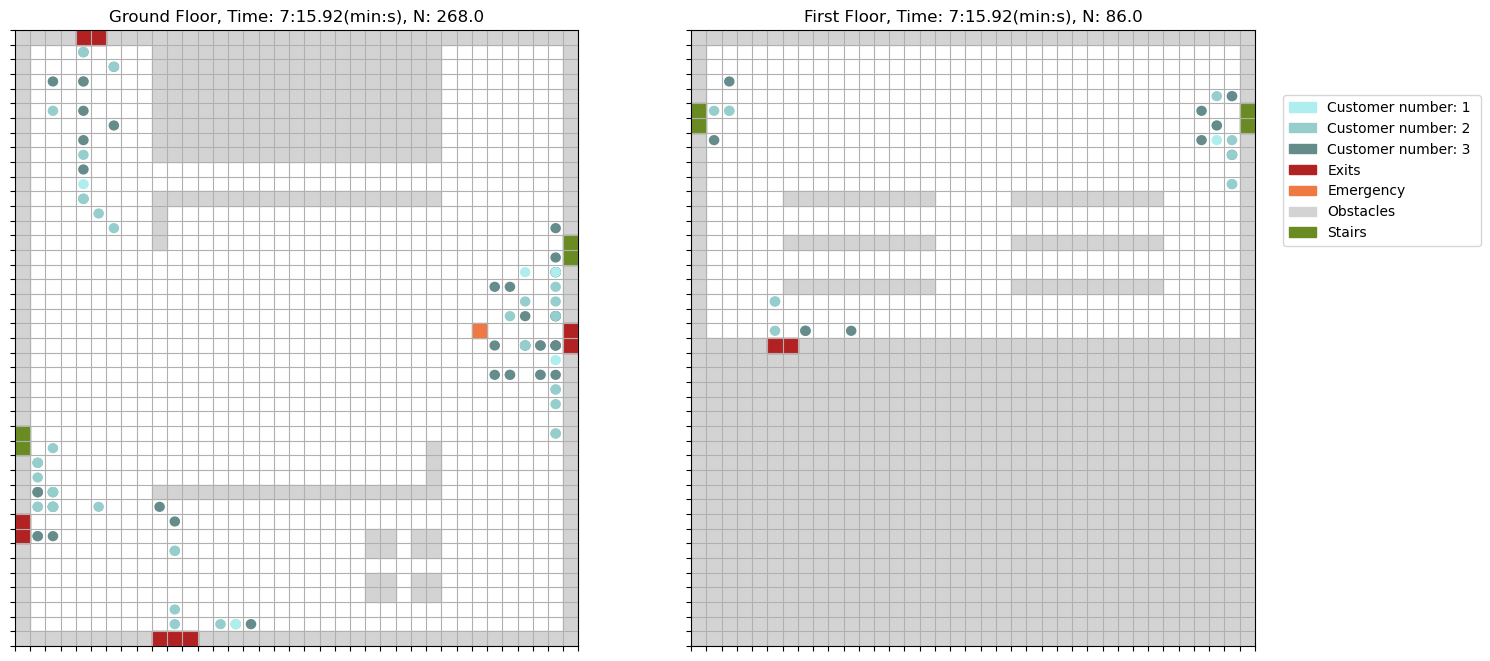

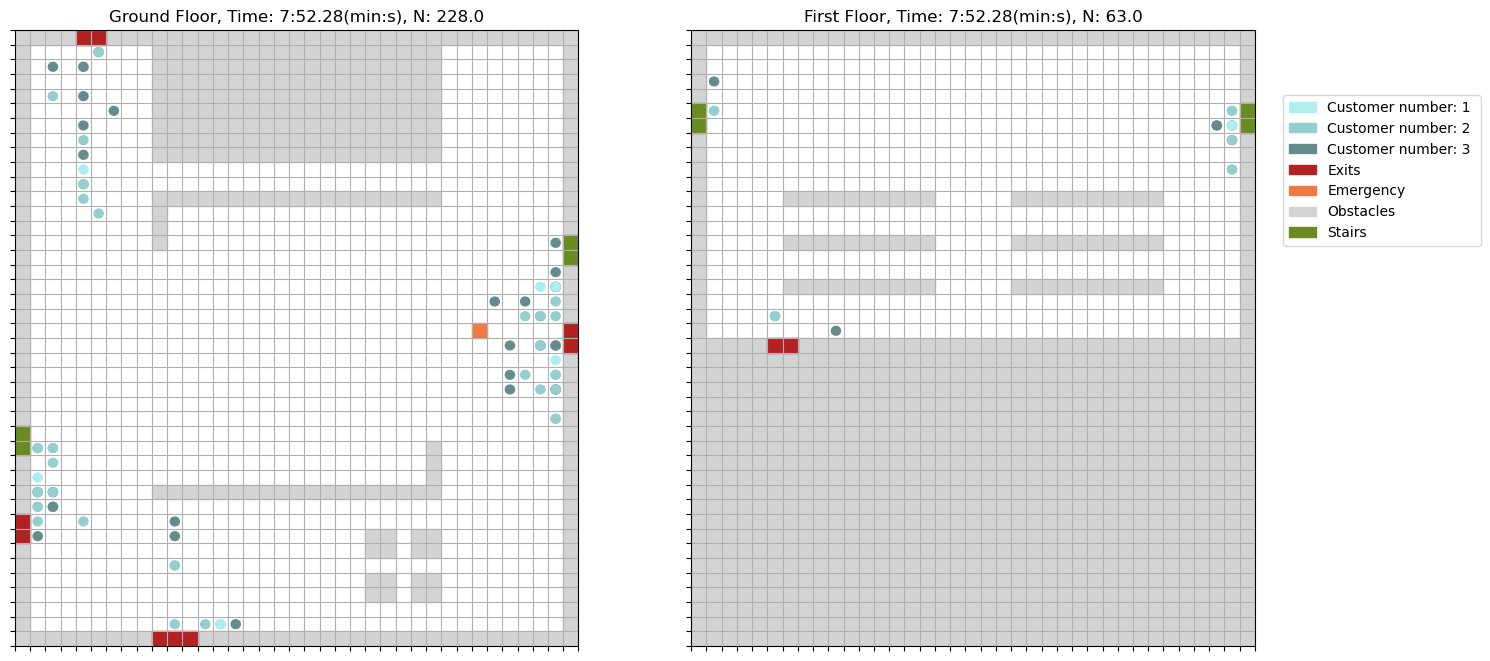

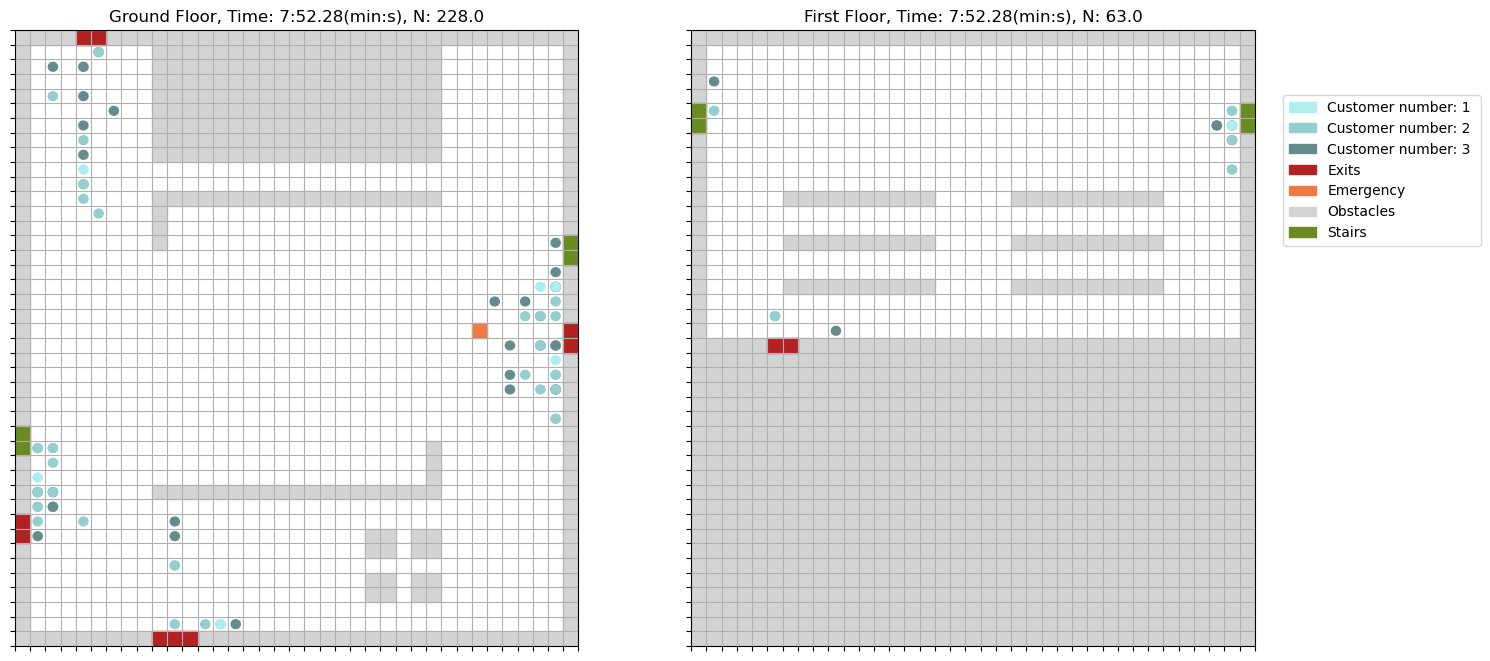

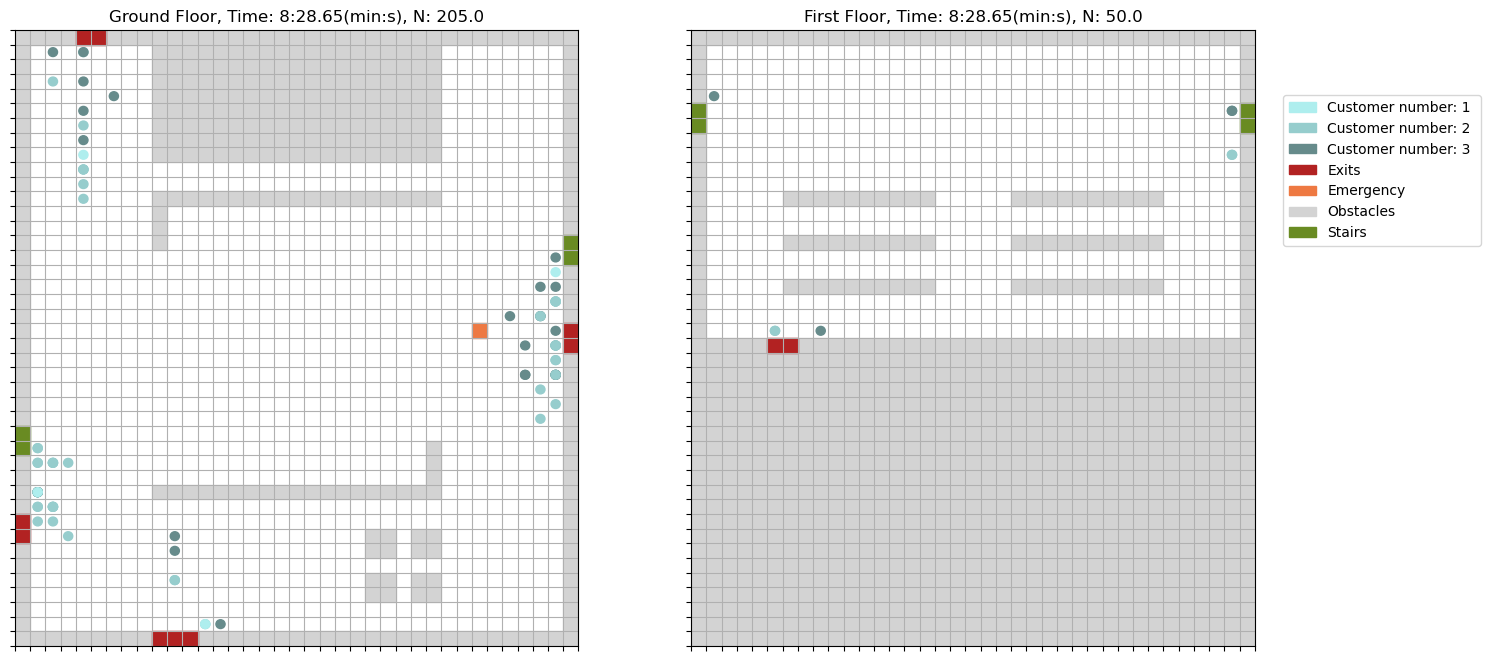

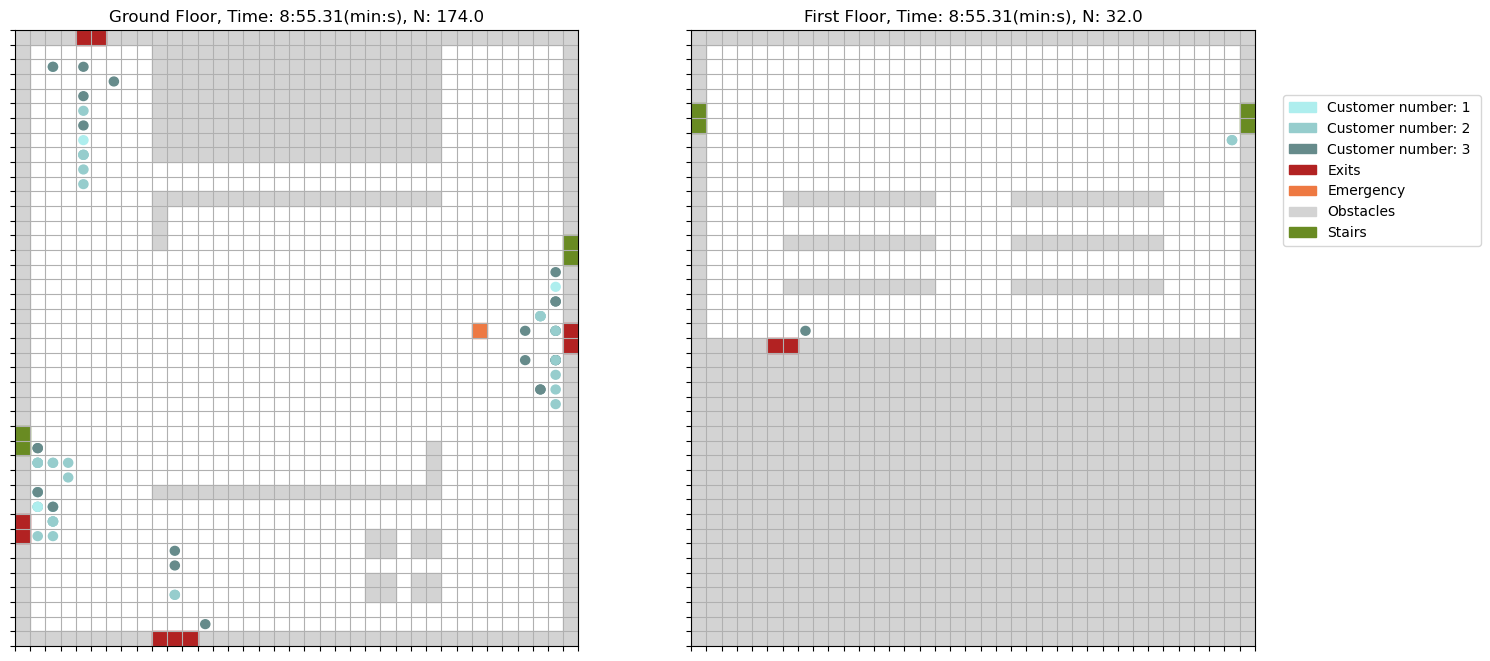

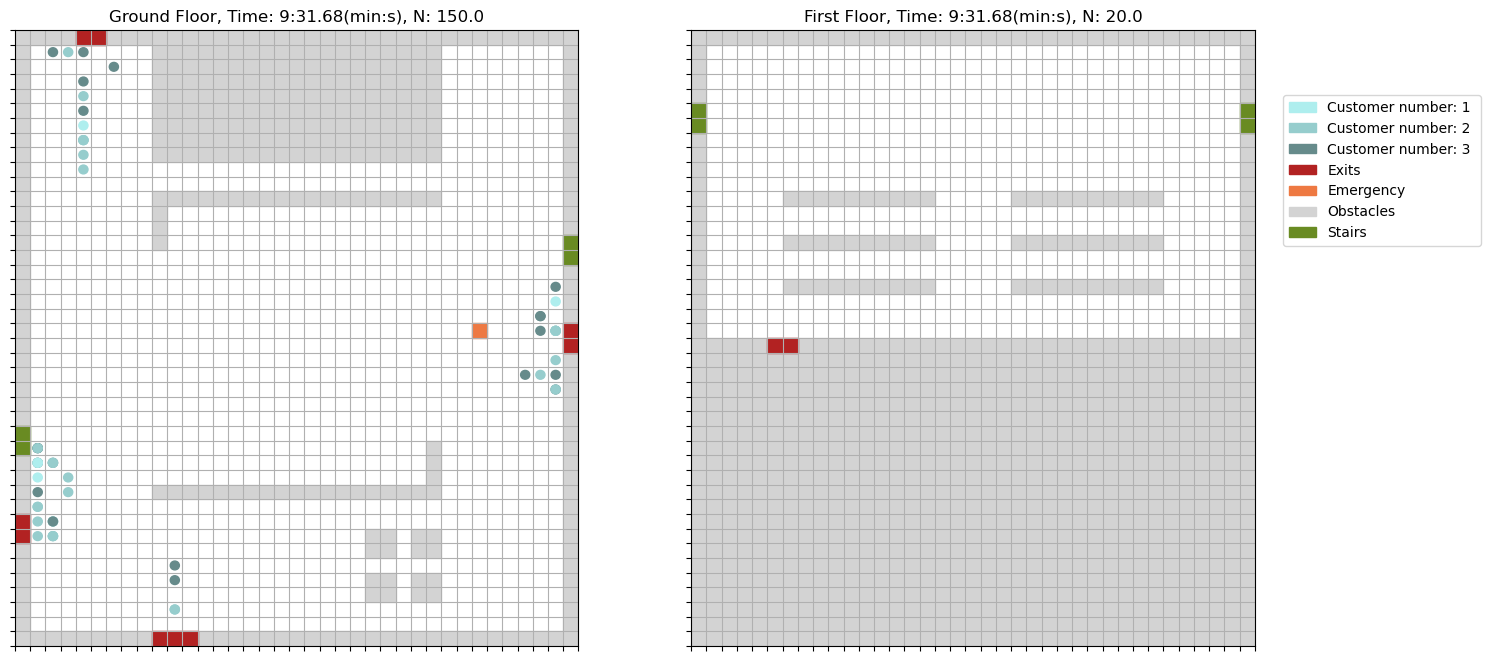

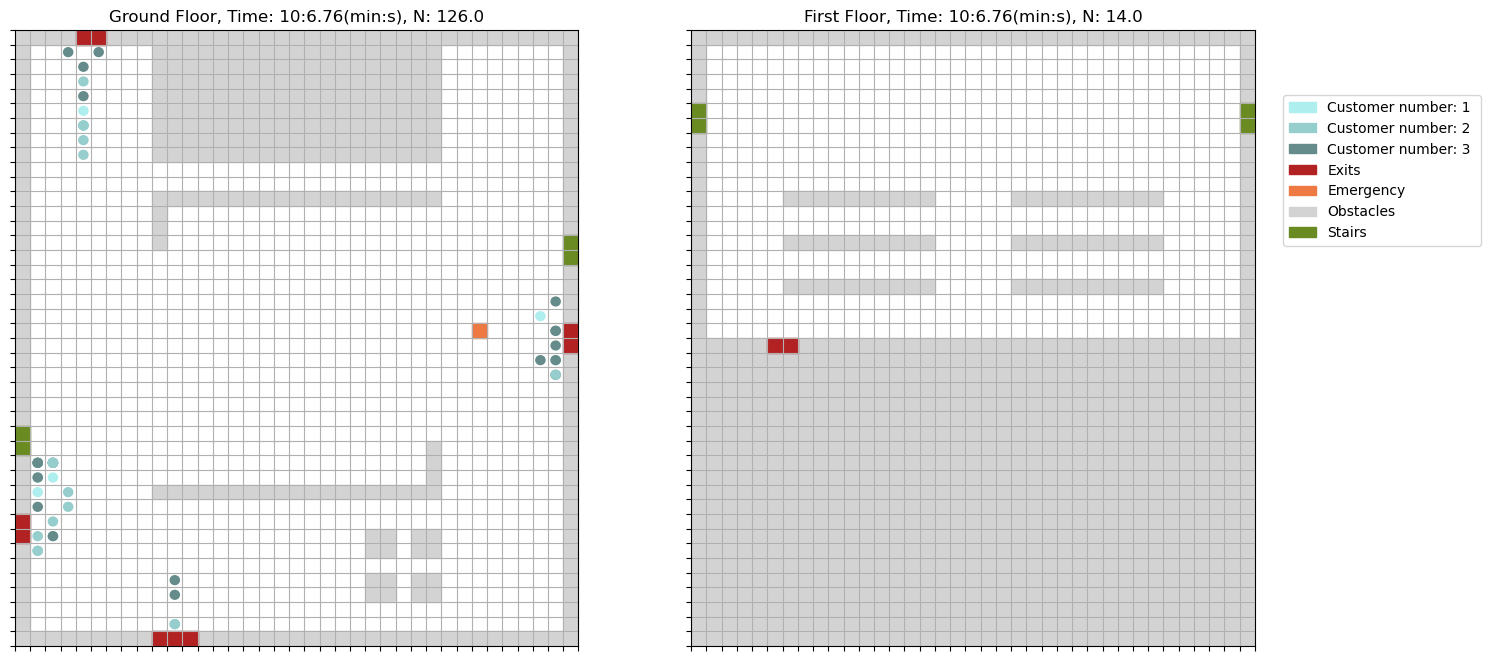

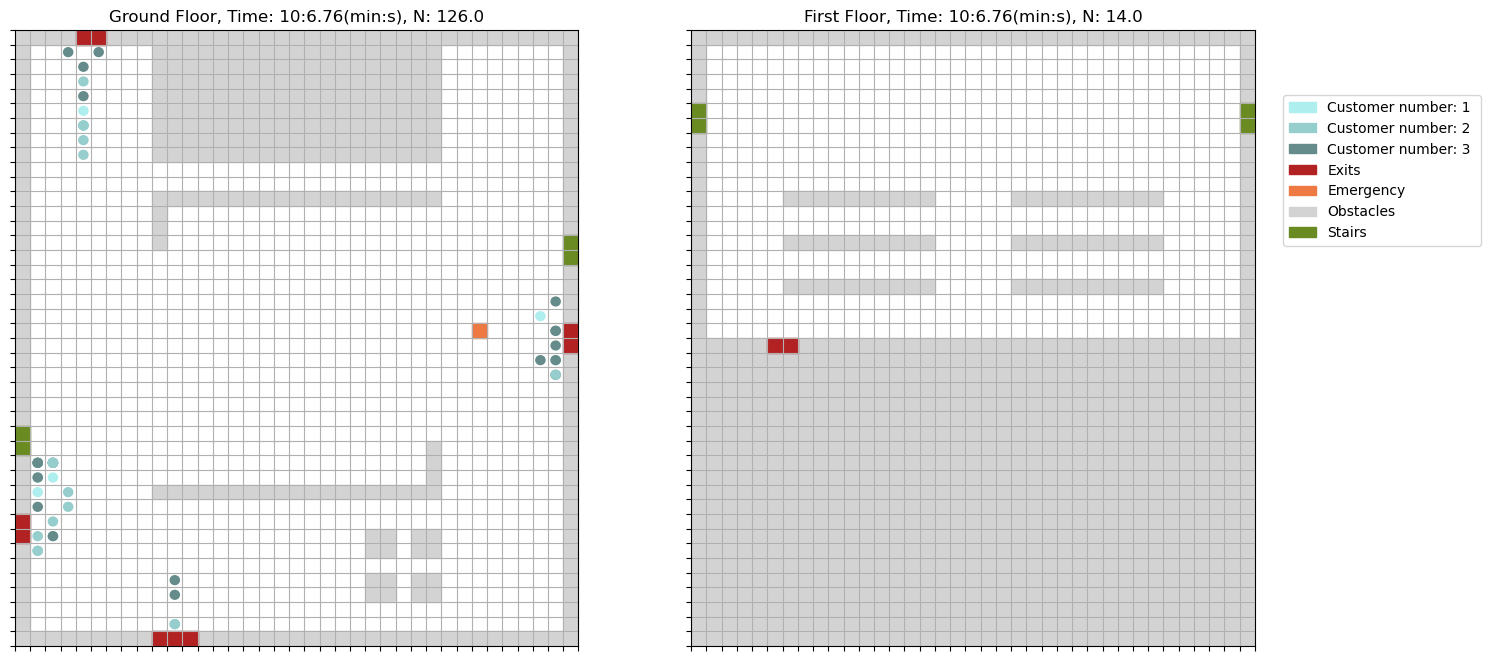

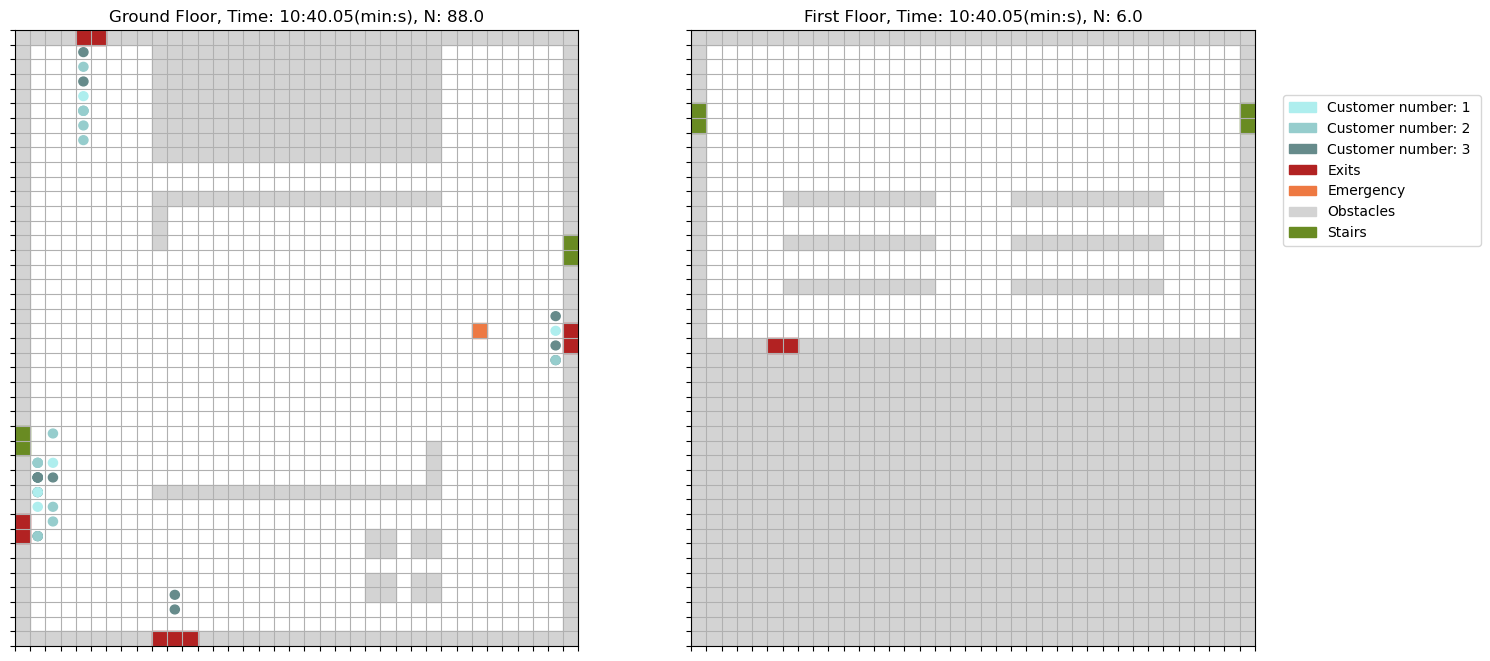

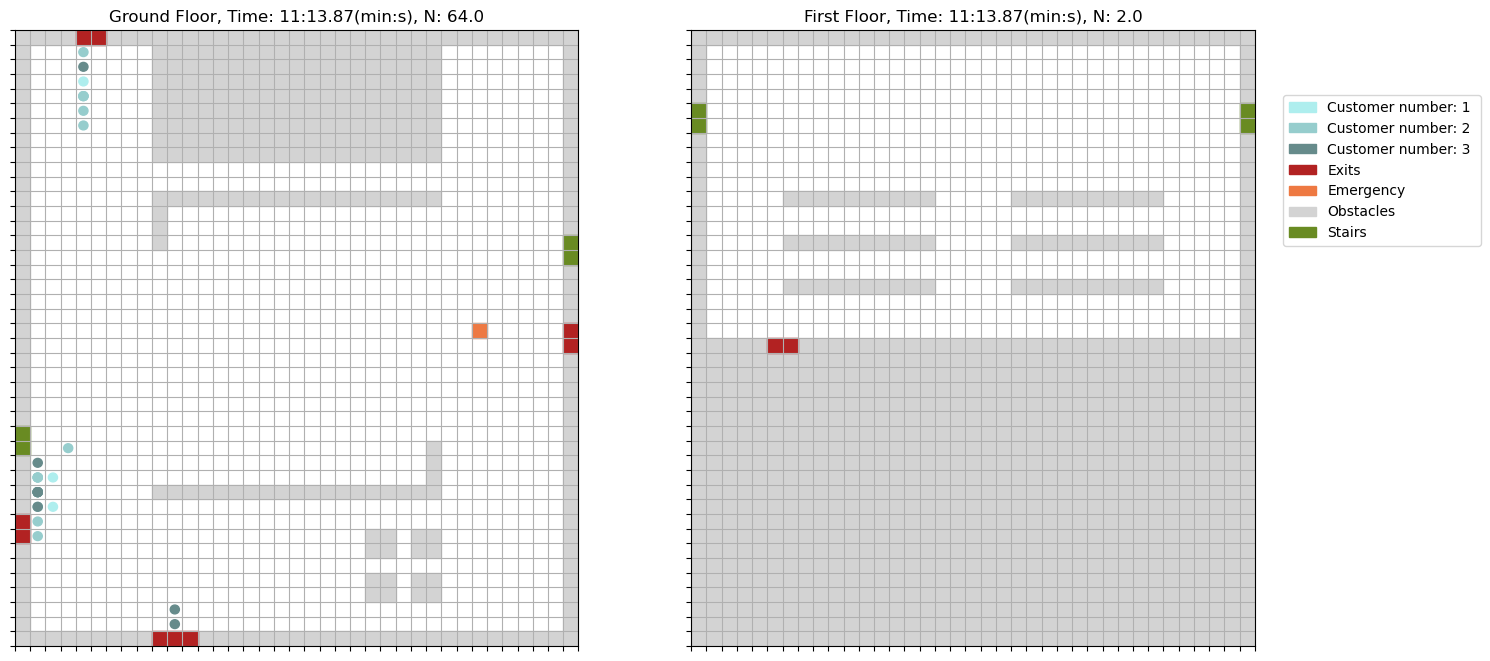

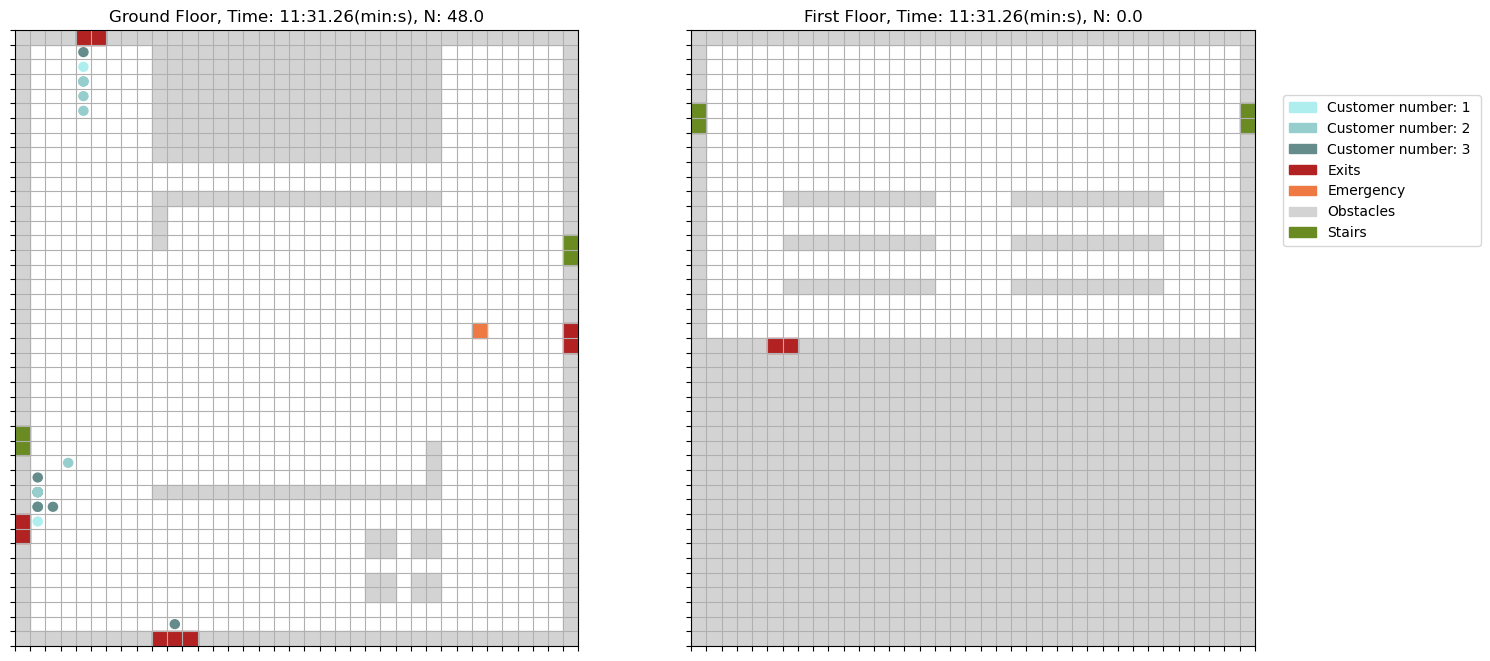

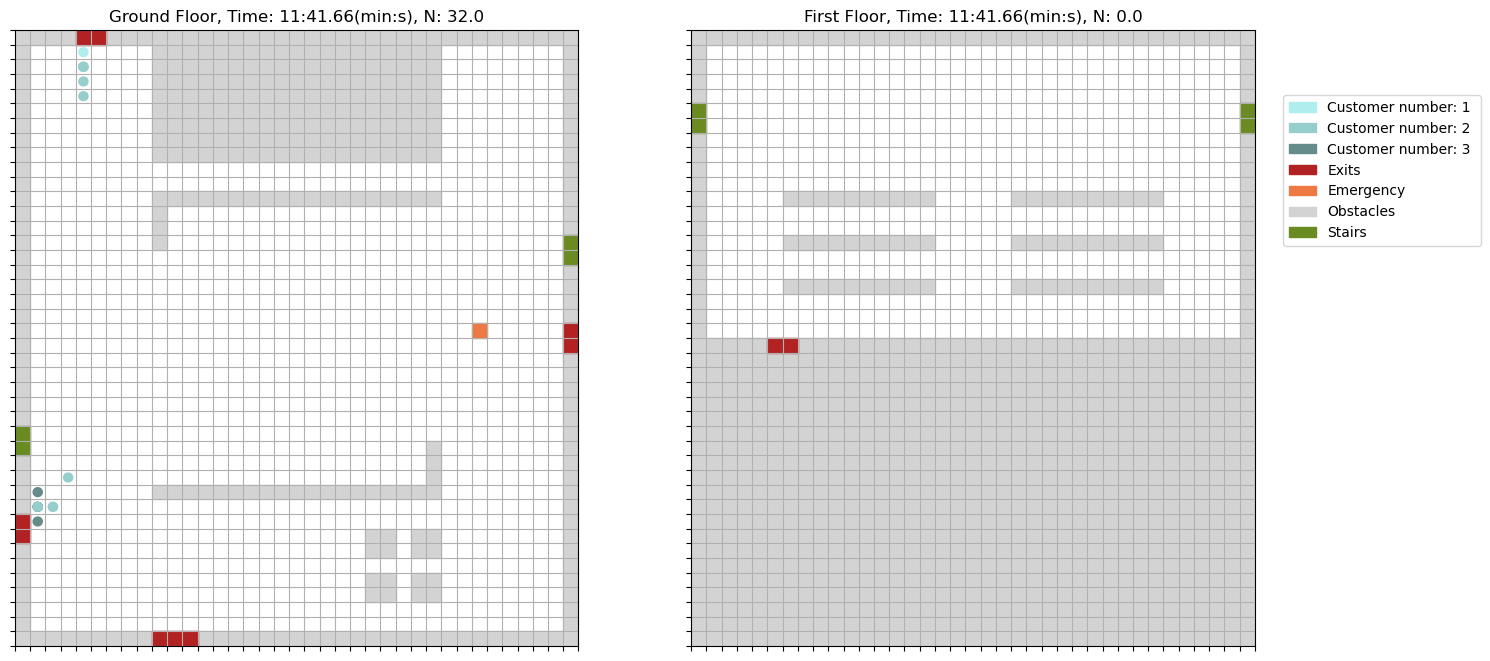

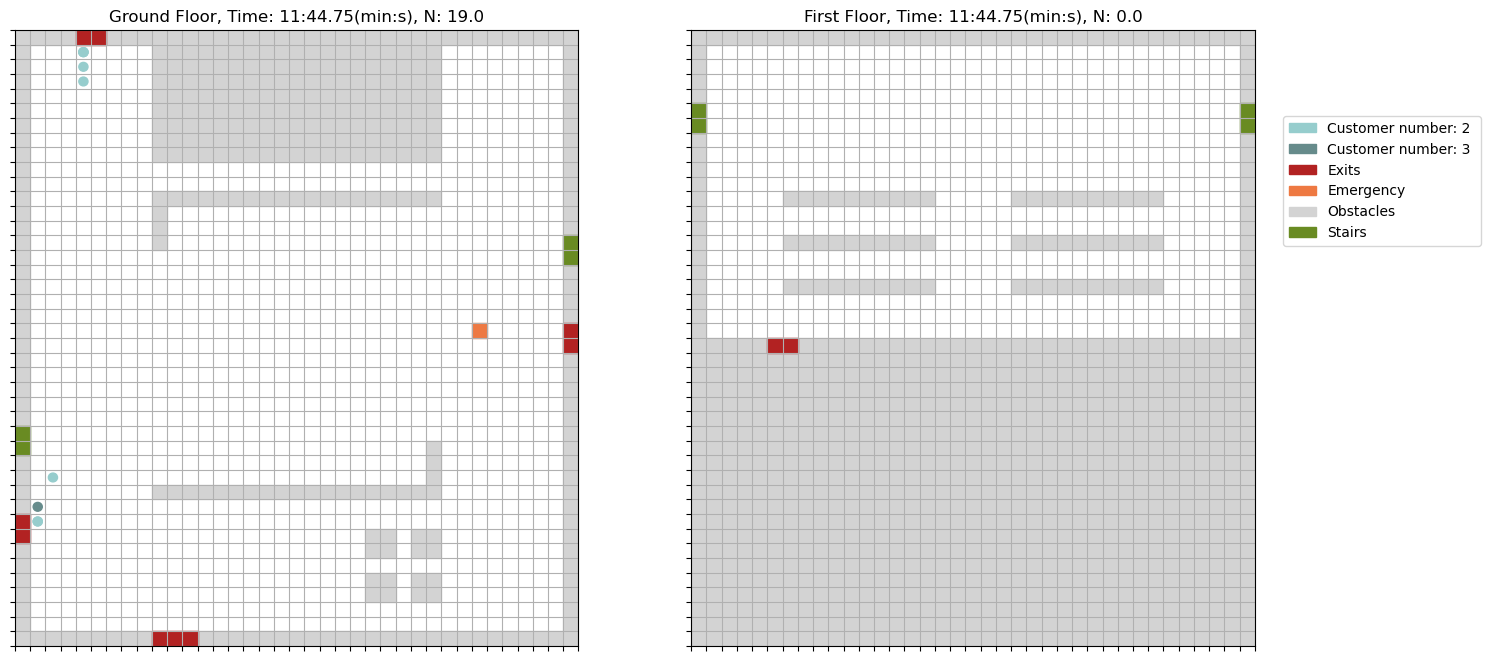

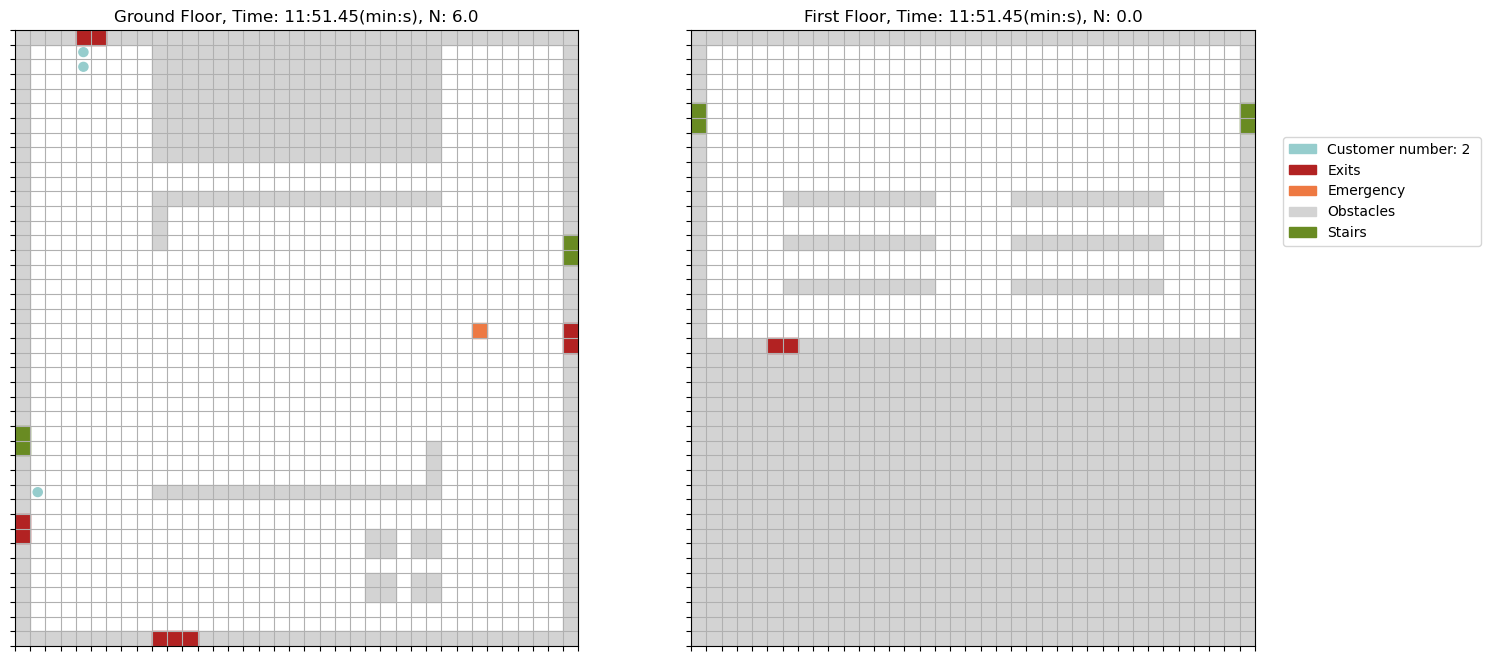

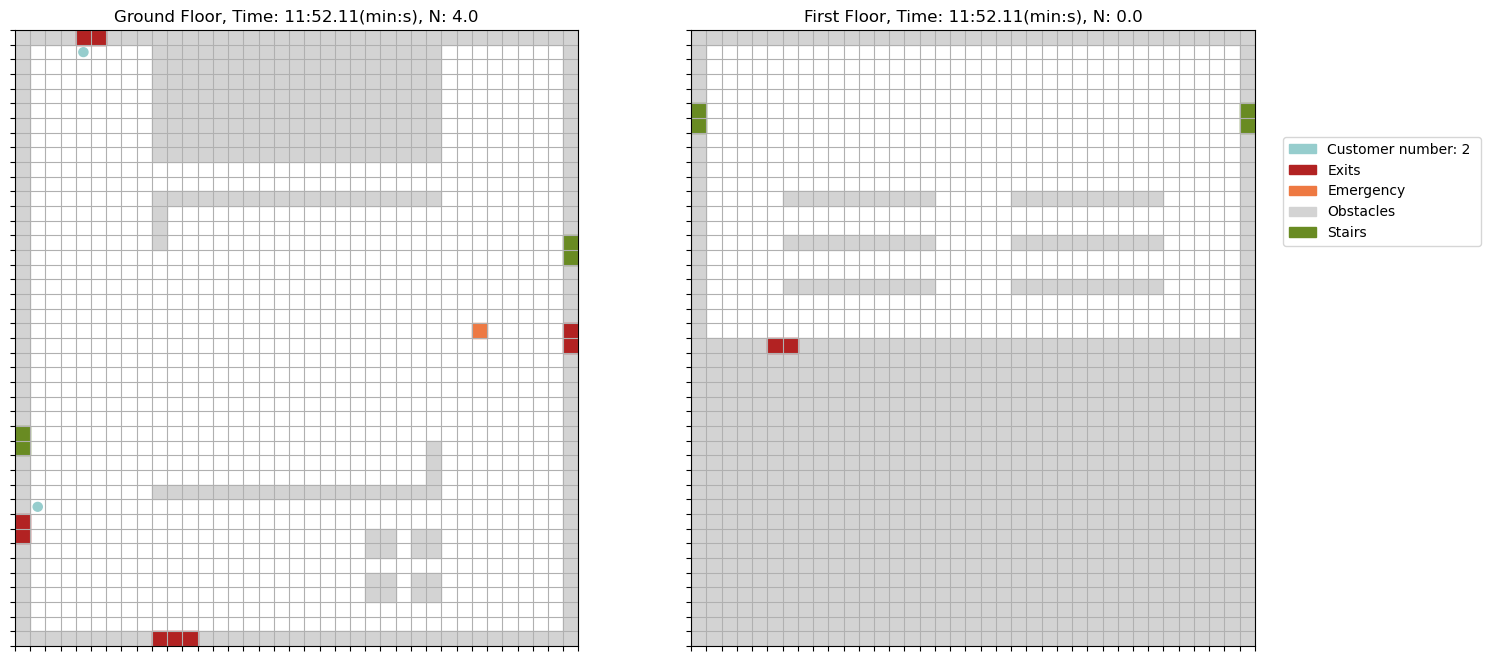

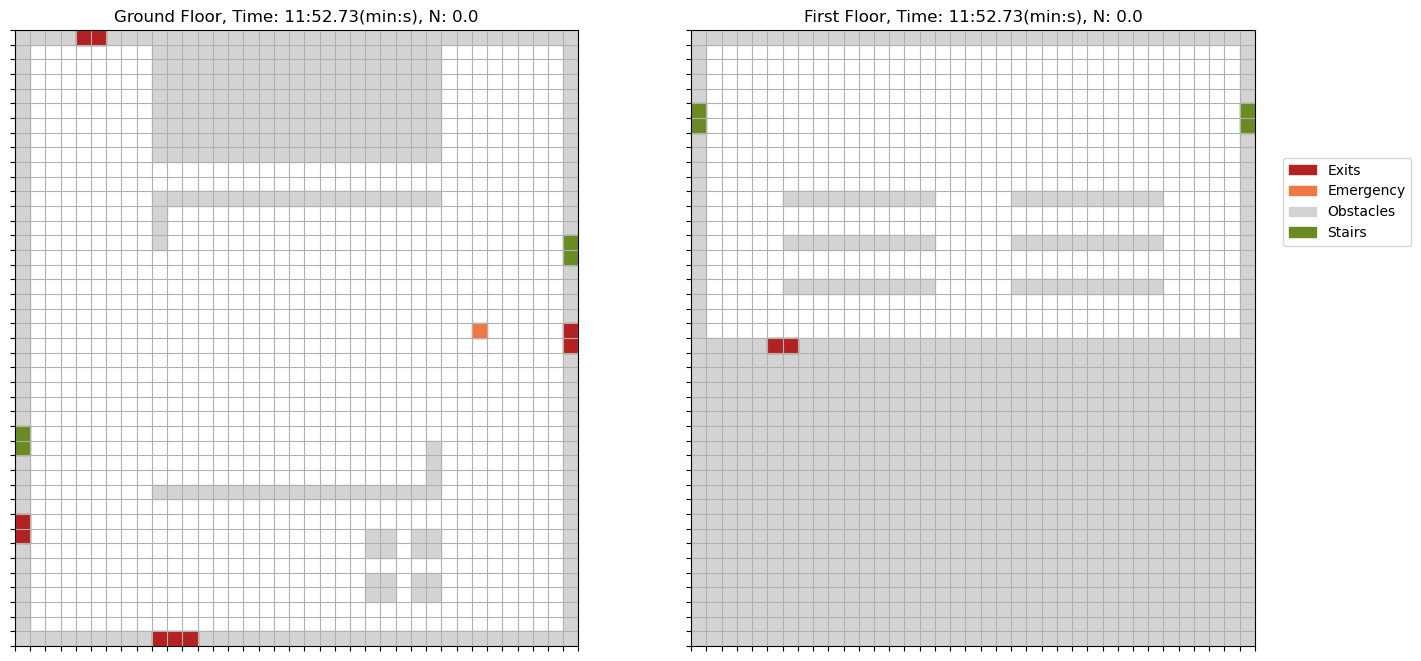

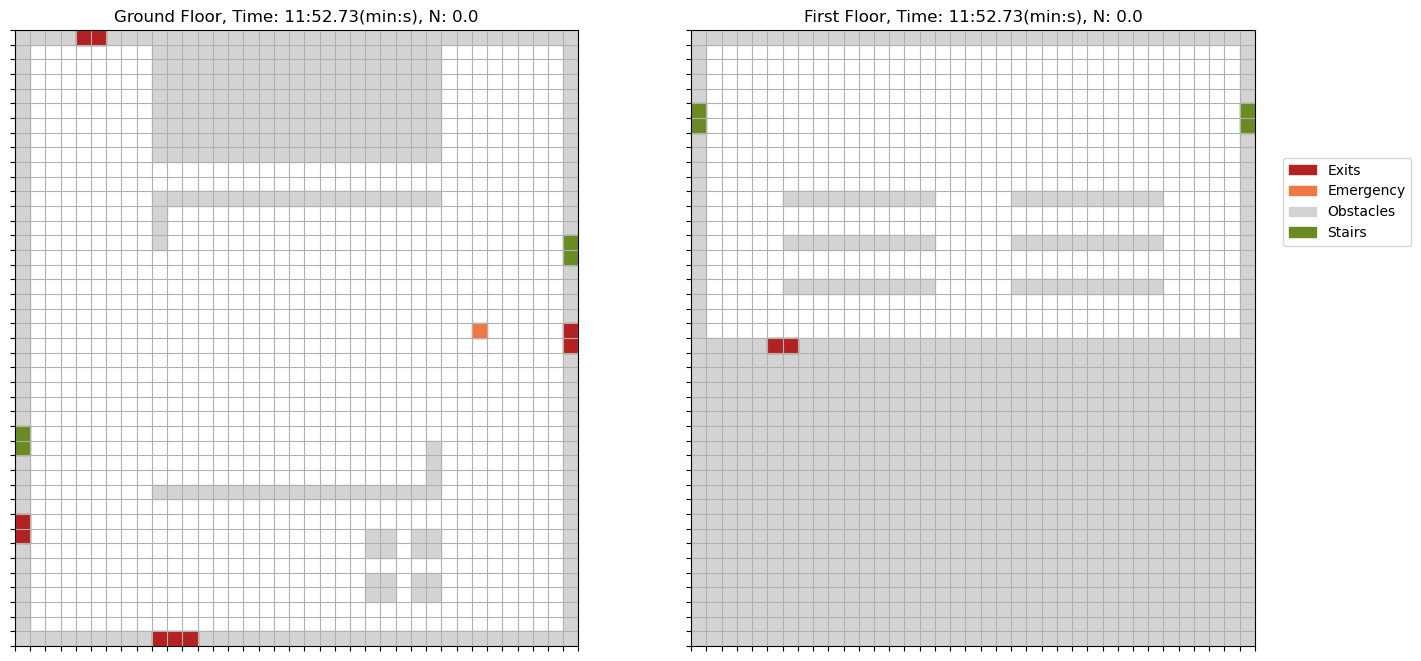

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import matplotlib.patches as mpathes
import pandas as pd

path='/Users/ginger./Desktop/Ginger/UNUK/y4/GP/project3/ground_floor.csv'
path1='/Users/ginger./Desktop/Ginger/UNUK/y4/GP/project3/first_floor.csv'
gr = pd.read_csv(path,header=None).dropna()
fr = pd.read_csv(path1,header=None).dropna()
ground_room = gr.values
first_room = fr.values

def plots(row0,column0,exit0,exit1,emergPos,stairs0,stairs1,cusData,time,customers0,customers1):
    fig,ax = plt.subplots(1, 2,figsize=(16, 8))
    flag = [0,0,0]
    pl = []
    
    for i in range(row0+2):
        for j in range(column0+2):
            if ground_room[i,j]==100:
                rect3 = mpathes.Rectangle((j, row0+1-i), 1, 1, color = '#D3D3D3')
                ax[0].add_patch(rect3)
            if first_room[i,j]==100:
                rect3 = mpathes.Rectangle((j, row0-i+1), 1, 1, color = '#D3D3D3')
                ax[1].add_patch(rect3)  
            
    for ex in exit0:
        rect1 = mpathes.Rectangle((ex[0], row0+1-ex[1]), 1, 1, color = '#B22222')
        ax[0].add_patch(rect1)
    for ex in exit1:
        rect1 = mpathes.Rectangle((ex[0], 41-ex[1]), 1, 1, color = '#B22222')
        ax[1].add_patch(rect1)
    for em in emergPos:
        rect2 = mpathes.Rectangle((em[0], row0+1-em[1]), 1, 1, color = '#EE7942')
        ax[0].add_patch(rect2)

    for s in stairs0:
        rect4 = mpathes.Rectangle((s[0], row0+1-s[1]), 1, 1, color = '#698B22')
        ax[0].add_patch(rect4)
    for s in stairs1:
        rect4 = mpathes.Rectangle((s[0], 41-s[1]), 1, 1, color = '#698B22')
        ax[1].add_patch(rect4)
    
    for i in range(len(cusData)):
        if cusData['floor'][i]==0 and cusData['evacuated'][i] == 0:
            n = cusData['num'][i]
            if n == 1:
                circle1 = mpathes.Circle((cusData['x'][i] + 0.5, 41-cusData['y'][i] + 0.5), 0.3, color = '#AEEEEE')
                ax[0].add_patch(circle1)
                if flag[0]==0:
                    flag[0] = 1
            elif n == 2:
                circle2 = mpathes.Circle((cusData['x'][i] + 0.5, 41-cusData['y'][i] + 0.5), 0.3, color = '#96CDCD')
                ax[0].add_patch(circle2)
                if flag[1]==0:
                    flag[1] = 1
            else:
                circle3 = mpathes.Circle((cusData['x'][i] + 0.5, 41-cusData['y'][i] + 0.5), 0.3, color = '#668B8B')
                ax[0].add_patch(circle3)
                if flag[2]==0:
                    flag[2] = 1
        
        elif cusData['floor'][i]==1 and cusData['evacuated'][i] == 0:
            n = cusData['num'][i]
            if n == 1:
                circle1 = mpathes.Circle((cusData['x'][i] + 0.5, 41-cusData['y'][i] + 0.5), 0.3, color = '#AEEEEE')
                ax[1].add_patch(circle1)
                if flag[0]==0:
                    flag[0] = 1
            elif n == 2:
                circle2 = mpathes.Circle((cusData['x'][i] + 0.5, 41-cusData['y'][i] + 0.5), 0.3, color = '#96CDCD')
                ax[1].add_patch(circle2)
                if flag[1]==0:
                    flag[1] = 1
            else:
                circle3 = mpathes.Circle((cusData['x'][i] + 0.5, 41-cusData['y'][i] + 0.5), 0.3, color = '#668B8B')
                ax[1].add_patch(circle3)
                if flag[2]==0:
                    flag[2] = 1

    
    if flag[0] == 1: pl.append(circle1)
    if flag[1] == 1: pl.append(circle2)
    if flag[2] == 1: pl.append(circle3)
    pl.append(rect1);pl.append(rect2);
    pl.append(rect3);pl.append(rect4)
        
    labels = ['Customer number: 1','Customer number: 2 ','Customer number: 3',
            'Exits','Emergency','Obstacles','Stairs']
    f = 0
    while flag.count(0) != 0:
        if flag[f] == 0:
            labels.pop(f); flag.pop(f);f = f-1
        f = f+1
               
    ax[0].set_title(f'Ground Floor, Time: {time}, N: {round(customers0,0)}')
    ax[0].set_xticks(np.linspace(0,column0+2,column0+3),labels = [])
    ax[0].set_yticks(np.linspace(0,row0+2,row0+3),labels = [])
    ax[0].grid()

    ax[1].set_title(f'First Floor, Time: {time}, N: {round(customers1,0)}')
    ax[1].set_xticks(np.linspace(0,column0+2,column0+3),labels = [])
    ax[1].set_yticks(np.linspace(0,row0+2,row0+3),labels = [])
    ax[1].grid()
    ax[1].legend(pl,labels,loc = (1.05,0.65))
    return


# random number with porprotion - [0.1, 0.592, 0.308]
def proportion_random():
    num = random.randint(0,1000)
    if 0<=num<100:
        return 1
    elif 100<num<=692:
        return 2
    else:
        return 3
    
def initial_position(N,row,column,cusData):
    coordinates = []
    random_list = []
    num = 0
    while num < N:
        generated_data = [random.randint(1, column), random.randint(1, row)]
        n = proportion_random()
        if not generated_data in coordinates and not generated_data in exitPos and not generated_data in emergPos and num+n <= N:  # remove repeated data
            coordinates.append(generated_data) 
            random_list.append(n)
            num += n
    return coordinates

def direction_choice(exit,x,y):
    choice = []
    min_direc = 1000
    direction = 0
    for num, ex in enumerate(exit):
        sing_dist = np.sqrt((x-ex[0])**2+(y-ex[1])**2)
        if sing_dist < min_direc:
            min_direc = sing_dist
            direction = num
    return direction

def speed(curPos):
    a = 3.1
    b = 1.1
    mu_p = 1 # no-panic: 1; lowpanic: 1.125; medimum-panic: 0.75; high-panic: 0.875
    slope = -(a-b)/5
    v = mu_p*(slope*(curPos)+a)
    return v

def danger_index(neighbors,exitPos,emergPos,a,b,pos):
    dd = []
    if exitPos == [[4,0],[5,0]] and pos == [10,12]:
        return [10,13]
    elif exitPos == [[4,0],[5,0]] and pos == [10,13]:
        return [10,14]
    elif exitPos == [[4,0],[5,0]] and pos == [10,14]:
        return [9,15]
    elif exitPos == [[4,0],[5,0]] and pos == [9,15]:
        return [8,15]
    else:
        for nei in neighbors:
            dist = 0
            w_exit = 0
            for i in exitPos:
                dist = np.sqrt((nei[0]-i[0])**2+(nei[1]-i[1])**2)
                w_exit +=  dist
            w_emerg = np.sqrt((nei[0]-emergPos[0][0])**2+(nei[1]-emergPos[0][1])**2)
            dd.append(a*w_exit+b*(1/w_emerg))
        a = 1000
        Pos = 0
        for n in range(len(dd)):
            if dd[n]< a:
                a = dd[n]; Pos = n
        return  neighbors[Pos]

def time_turner(seconds):
    hours = int(seconds/3600)
    seconds -= hours*3600
    minutes = int(seconds/60)
    seconds -= minutes*60
    if hours == 0:
        return f'{minutes}:{round(seconds,2)}(min:s)'
    else:
        return f'{hours}:{minutes}:{round(seconds,2)}(h:min:s)'
        

import warnings
warnings.filterwarnings("ignore") 
#0: left, middle, right
#1: left,middle right
interval = 100
evaNum = 100

b = 1 #exit
c = 1 #emergency
bc = b+c
time = 0
evacuation = []
evaNum0 = 150

# plots(row0,column0,exit0,exit1,emergPos,stairs0,stairs1,cusData,'0:0:0',N0,N1)
heatRoom0 = ground_room.copy()
heatRoom1 = first_room.copy()
    
N0 = 600
N1 = 300
row0 = 40
column0 = 35
row1 = 20
column1 = 35

# exitPos = [[0,8,2],[37,20,2],[8,0,3]]
exit0 = [[0,33],[0,34],[9,41],[10,41],[11,41],[36,20],[36,21],[4,0],[5,0]]
exit1 = [[5,21],[6,21]]

# ,[0,22],[0,23]

emergPos = [[30,20]]
stairs0 = [[0,27],[0,28],[36,14],[36,15]]
stairs1 = [[0,5],[0,6],[36,5],[36,6]]

cusData = pd.DataFrame({'x':[],'y':[],'num':[],'evacuated':[],'direction':[],'floor':[],'stairCount':[]})

num = 0
coordinates = []
occupant = 0
    
######## position initializing ########

while num <= N0:
    x = int(random.randint(1, column0)); y = int(random.randint(1, row0))
    n = proportion_random()
    if not [x,y] in coordinates and not [x,y] in exit0 and not [x,y] in emergPos and n+num <=N0 and ground_room[y,x] != 100:
        coordinates.append([x,y])
        cusData.loc[occupant,'x'] = x
        cusData.loc[occupant,'y'] = y
        cusData.loc[occupant,'num'] = n
        cusData.loc[occupant,'evacuated'] = 0
        cusData.loc[occupant,'floor'] = 0
        cusData.loc[occupant,'stairCount'] = 0
        cusData.loc[occupant,'stairCount'] = 0
        num += n
        occupant += 1
        if num == N0:
            break
            
num = 0
coordinates = []
while num <= N1:
    x = int(random.randint(1, column1)); y = int(random.randint(1, row1))
    n = proportion_random()
    if not [x,y] in coordinates and not [x,y] in exit1 and n+num <=N1 and first_room[y,x] != 100:
        coordinates.append([x,y])
        cusData.loc[occupant,'x'] = x
        cusData.loc[occupant,'y'] = y
        cusData.loc[occupant,'num'] = n
        cusData.loc[occupant,'evacuated'] = 0
        cusData.loc[occupant,'floor'] = 1
        cusData.loc[occupant,'stairCount'] = 4
        num += n
        occupant += 1
        if num == N1:
            break
            
exit_g = [[0,32],[9,41],[36,20],[3,0]]
exit_f = [[0,5],[5,21],[36,5]]

for i in range(len(cusData)):
    if cusData['floor'][i]==0:
        cusData.loc[i,'direction'] = direction_choice(exit_g,cusData['x'][i],cusData['y'][i])
    if cusData['floor'][i]==1:
        cusData.loc[i,'direction'] = direction_choice(exit_f,cusData['x'][i],cusData['y'][i])
        
######## evacuation start ########
plots(row0,column0,exit0,exit1,emergPos,stairs0,stairs1,cusData,time_turner(round(0,3)),N0,N1)

while np.any(cusData['evacuated'] == 0):
    curTime = 0
    curRoom0 = ground_room.copy()
    curRoom1 = first_room.copy()
    curExit0 = np.zeros((1,len(exit0)))[0]
    curExit1 = np.zeros((1,6))[0]
    for i in range(len(cusData)): 
        if cusData['floor'][i] == 1:
            curRoom1[int(cusData['y'][i]),int(cusData['x'][i])] = cusData['num'][i]
            heatRoom1[int(cusData['y'][i]),int(cusData['x'][i])] += cusData['num'][i]
        elif cusData['floor'][i] == 0 and cusData['evacuated'][i] == 0:
            curRoom0[int(cusData['y'][i]),int(cusData['x'][i])] = cusData['num'][i]
            heatRoom0[int(cusData['y'][i]),int(cusData['x'][i])] += cusData['num'][i]
        
        
    for i in range(len(cusData)):
        #people reach the stair
        if cusData['floor'][i] == 0.5:
            cusData.loc[i,'stairCount'] = cusData['stairCount'][i]-1
            if curTime < 10/4: ### can be revised - depends on the time spent going downstair
                curTime = 10/4
            if cusData['stairCount'][i] == 0:
                cusData.loc[i,'floor'] = 0
                if cusData['direction'][i] == 0:
                    cusData.loc[i,'x'] = 1  #can be revise
                    cusData.loc[i,'y'] = random.randint(27,28)
                    cusData.loc[i,'direction'] = 0
                if cusData['direction'][i] == 2:
                    cusData.loc[i,'x'] = 35  #can be revise
                    cusData.loc[i,'y'] = random.randint(20,21)
                    cusData.loc[i,'direction'] = 2
                
                
            #people in the first floor:
        if cusData['floor'][i] == 1 and cusData['evacuated'][i] == 0:
            pos = [int(cusData['x'][i]),int(cusData['y'][i])]
            neighbors = [[pos[0]-1,pos[1]-1],[pos[0]-1,pos[1]],[pos[0]-1,pos[1]+1],
                        [pos[0],pos[1]-1],[pos[0],pos[1]+1],[pos[0]+1,pos[1]-1],
                        [pos[0]+1,pos[1]],[pos[0]+1,pos[1]+1]]
            validnei = []
            distance = row0
            newPos = pos
            v = speed(int(curRoom1[pos[1],pos[0]]))
            for n in range(len(neighbors)):
                if neighbors[n] in exit1: # find the cloest exit to get out
                    cusData.loc[i,'evacuated'] = 1
                    cusData.loc[i,'floor'] = 0
                    for curex, ex in enumerate(exit1):
                        curDist = np.sqrt((pos[0]-ex[0])**2+(pos[1]-ex[1])**2)
                        if curDist < distance and curExit1[curex]+ cusData['num'][i]< 5:
                            newPos = ex
                            distance = curDist
                            curExit1[curex] += cusData['num'][i]
                            curRoom1[pos[1]][pos[0]] -= cusData['num'][i]     
                    break
                elif neighbors[n] in stairs1:
                    cusData['floor'][i] = 0.5
                    for curex, ex in enumerate(stairs1):
                        curDist = np.sqrt((pos[0]-ex[0])**2+(pos[1]-ex[1])**2)
                        if curDist < distance and curExit1[curex+2]+ cusData['num'][i]< 5:
                            newPos = ex
                            distance = curDist
                            curExit1[curex+2] += cusData['num'][i]
                            curRoom1[pos[1]][pos[0]] -= cusData['num'][i]     
                    break
                elif curRoom1[neighbors[n][1]][neighbors[n][0]] != 100 and curRoom1[neighbors[n][1]][neighbors[n][0]]+ cusData['num'][i]< 6:
                    validnei.append(neighbors[n])   
                    curRoom1[neighbors[n][1]][neighbors[n][0]] +=  cusData['num'][i]
                    curRoom1[pos[1]][pos[0]] -= cusData['num'][i]
            if validnei != []:
                if cusData['direction'][i]==0:
                    exit_1 = [[0,5],[0,6]]
                elif cusData['direction'][i]==1:
                    exit_1 = [[5,21],[6,21]]
                elif cusData['direction'][i]==2:
                    exit_1 = [[36,5],[36,6]]
                newPos = danger_index(validnei,exit_1,emergPos,1,0,pos)
                distance = np.sqrt((newPos[0]-pos[0])**2+(newPos[1]-pos[1])**2)
            cusData.loc[i,'x'],cusData.loc[i,'y'] = newPos[0],newPos[1]
            if curTime < distance/v:
                curTime = distance/v
        
            # # people in the ground floor
        if cusData['floor'][i] == 0 and cusData['evacuated'][i] == 0:
            pos = [int(cusData['x'][i]),int(cusData['y'][i])]
            neighbors = [[pos[0]-1,pos[1]-1],[pos[0]-1,pos[1]],[pos[0]-1,pos[1]+1],
                        [pos[0],pos[1]-1],[pos[0],pos[1]+1],[pos[0]+1,pos[1]-1],
                        [pos[0]+1,pos[1]],[pos[0]+1,pos[1]+1]]

            validnei = []
            distance = row0
            newPos = pos
            v = speed(int(curRoom0[pos[1],pos[0]]))
            for n in range(len(neighbors)):
                if neighbors[n] in exit0: # find the cloest exit to get out
                    cusData.loc[i,'evacuated'] = 1
                    for curex, ex in enumerate(exit0):
                        curDist = np.sqrt((pos[0]-ex[0])**2+(pos[1]-ex[1])**2)
                        if curDist < distance and curExit0[curex]+ cusData['num'][i]< 5:
                            newPos = ex
                            distance = curDist
                            curExit0[curex] += cusData['num'][i]
                            curRoom0[pos[1]][pos[0]] -= cusData['num'][i]    
                    break
                elif curRoom0[neighbors[n][1]][neighbors[n][0]] != 100 and [neighbors[n][0],neighbors[n][1]] not in emergPos and curRoom0[neighbors[n][1]][neighbors[n][0]]+ cusData['num'][i]< 6:
                    validnei.append(neighbors[n])   
                    curRoom0[neighbors[n][1]][neighbors[n][0]] +=  cusData['num'][i]
                    curRoom0[pos[1]][pos[0]] -= cusData['num'][i]
            if cusData['evacuated'][i] != 1 and validnei != []:
                if cusData['direction'][i]==0:
                    exit_0 = [[0,33],[0,34]]
                elif cusData['direction'][i]==1:
                    exit_0 = [[9,41],[10,41],[11,41]]
                elif cusData['direction'][i]==2:
                    exit_0 = [[36,20],[36,21]]
                elif cusData['direction'][i]==3:
                    exit_0 = [[4,0],[5,0]]
                newPos = danger_index(validnei,exit_0,emergPos,1/2,1/2,pos)
                distance = np.sqrt((newPos[0]-pos[0])**2+(newPos[1]-pos[1])**2)
            cusData.loc[i,'x'],cusData.loc[i,'y'] = newPos[0],newPos[1]
            if curTime < distance/v:
                curTime = distance/v

    time += curTime
    evacuatedCus = np.dot(list(cusData['evacuated']),list(cusData['num']))
    evacuation.append(evacuatedCus)

    N0 = np.dot((1-cusData['floor'])*(1-cusData['evacuated']),cusData['num'])
    N1 = np.dot(cusData['floor'],cusData['num'])
    plots(row0,column0,exit0,exit1,emergPos,stairs0,stairs1,cusData,time_turner(round(time,3)),N0,N1)
    
    if N0 + N1 < 900-evaNum0:
        plots(row0,column0,exit0,exit1,emergPos,stairs0,stairs1,cusData,time_turner(round(time,3)),N0,N1)
        evaNum0 += 150
    if N0 + N1 == 0:
        plots(row0,column0,exit0,exit1,emergPos,stairs0,stairs1,cusData,time_turner(round(time,3)),N0,N1)
    
